# infos

    A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

    O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.

    Contudo, o time de vendas tem uma capacidade de realizar 20 mil ligações dentro do período da campanha.
    
   =============================================================================================
   
    Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

    Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

    E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

    Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

   =======================================================================================
    
    Explore os Dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes.

    Levante Hipóteses sobre as características de transações legítimas e fraudulentas. Valide ou refute essas hipóteses através dos dados.

    Prepare os Dados para que os Algoritmos Estatísticos ou de Machine Learning sejam capazes de aprender a tarefa.

    Escreva vários algoritmos Classificadores.

    Contabilize a Performance do Modelo de Machine Learning e transforme em Performance de Negócio.

    Desenvolva uma API que retorne um “Score de Propensão” de compra para cada cliente, ou seja, uma probabilidade do cliente estar interessado em comprar um seguro de automóvel.

    Crie um README sobre como interpretar e usar a sua solução.

    Escreva um Relatório, respondendo às perguntas de negócio.

In [14]:
# terminal é bom devido aos comandos de inserção de dados *****************************

# dbeaver é bom para validar queries do/no jupyter notebook ou pegar informações rápidas sem precisar processar dados ******************


######################conexão específica para postgres no terminal

# instalar psql terminal ubuntu
# man psql = comando para abrir o manual do psql (ou main)
# psql -h comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com \   o \ é pra continuar da próxima linha
# > -p 5432 \           # testar sem todos os escapes
# > -d comunidadedsdb \
# > -U member \
# > -W cdspa

# agora dentro do database, encontrar schemas/tabelas

# \dn listar os schemas
# \dt pa004.*             comando p/ ver tabelas, como n se sabe as tabelas na primeira vez, passar o * q é um coringa
# \dt+ pa004.*            saber o tamanho das tabelas em mbs
# select * from pa004.users limit 10;
# \q sai do banco de dados



##################### comandos no dbeaver(linguagem sql)
# select nspname from pg_catalog.pg_namespace pn          para ver os schemas
# select tablename from pg_catalog.pg_tables where schemaname = 'pa004'           para ver as tabelas


#################### pelo python usar o sql alchemy/pandas  (psycopg2 específico para postgres)
# geralmente usar pandas , possue métodos de conexão com bancos

# não deixar as credenciais no jupyter notebook/não comitar as credenciais ***********************
# usar máscara pra esconder as credenciais

# sempre fechar o cursor (cursor.close()) e a conexão (conn.close()) **************************

import psycopg2 as pg


conn = pg.connect(user= password= gost= port= database=)
query_table_users = ***
    SELECT * FROM pa004.users...
    LIMIT 10;
    ****
(primeiro criar a conexão e a query_tables_users)
df=pd.read_sql(query_tables_users,conn)
df.head()

SyntaxError: invalid syntax (155363827.py, line 42)

# 0 **Imports**

In [41]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import scikitplot as skplt
import matplotlib.gridspec as gridspec
import warnings;   warnings.filterwarnings("ignore")
import xgboost as xgb
import lightgbm as lightgbm

from matplotlib            import pyplot  as plt
from IPython.display       import Image
from IPython.core.display  import HTML
from pylab                 import rcParams
from IPython.display       import Image
from scipy                 import stats  as ss
from sklearn               import model_selection as ms
from sklearn.metrics       import accuracy_score, f1_score,classification_report
from sklearn               import preprocessing as pp
from sklearn               import ensemble        as en
from sklearn               import linear_model    as lm
from sklearn               import neighbors       as nh
from sklearn.metrics import top_k_accuracy_score
from sklearn.tree          import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# pd.options.display.float_format = '{:,.2f}'.format

##  **0.1 Helper functions**

In [2]:
# def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
    
#     plt.style.use( 'bmh' )
#     plt.rcParams['figure.figsize'] = [25, 12]
#     plt.rcParams['font.size'] = 24
#     sns.set_style("whitegrid")
#     plt.style.use("dark_background")
#     rcParams['figure.figsize'] = 28,10
        
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.set_option( 'display.expand_frame_repr', False )
#     pd.options.display.float_format = '{:,.2f}'.format
    
#     sns.set()
    
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

def precision_at_k( data, k=10 ):
    data = data.reset_index( drop=True )
    data['ranking'] = data.index + 1
    
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    
    return ( data.loc[ k, 'precision_at_k'], data )

def recall_at_k( data, k=15 ):
    data = data.reset_index( drop=True )
    data['ranking'] = data.index + 1
    
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return ( data.loc[ k, 'recall_at_k'], data )

In [3]:
# jupyter_settings()

## **0.2 Loading data**

In [26]:
test=pd.read_csv('../data/test.csv')

df_insurance_raw=pd.read_csv('../data/insurance_202206101822.csv')
df_users_raw=pd.read_csv('../data/users_202206101824.csv')
df_vehicles_raw=pd.read_csv('../data/vehicle_202206101824.csv')

# merge
df_raw=pd.merge(df_insurance_raw,df_users_raw,how='left',on='id')
df_raw=pd.merge(df_raw,df_vehicles_raw,how='left',on='id')

# **Step 1 Data description**

In [27]:
df1=df_raw.copy()

In [28]:
df1

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,1,0,40454.0,217,1,Male,44,28.0,26.0,1,> 2 Years,Yes
1,2,0,33536.0,183,0,Male,76,3.0,26.0,1,1-2 Year,No
2,3,0,38294.0,27,1,Male,47,28.0,26.0,1,> 2 Years,Yes
3,4,1,28619.0,203,0,Male,21,11.0,152.0,1,< 1 Year,No
4,5,1,27496.0,39,0,Female,29,41.0,152.0,1,< 1 Year,No
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,30170.0,88,0,Male,74,26.0,26.0,1,1-2 Year,No
381105,381106,1,40016.0,131,0,Male,30,37.0,152.0,1,< 1 Year,No
381106,381107,1,35118.0,161,0,Male,21,30.0,160.0,1,< 1 Year,No
381107,381108,0,44617.0,74,0,Female,68,14.0,124.0,1,> 2 Years,Yes


## **1.1 Data types**

In [18]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## **1.2 Change types**

In [19]:
df1['region_code']=df1['region_code'].astype('int64')
df1['policy_sales_channel']=df1['policy_sales_channel'].astype('int64')

## **1.3 Check NA**

In [20]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
response                0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## **1.4 Descriptive statistics**

In [21]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64'])

### **1.4.1 Numerical attributes**

In [22]:
# Central Tendency - mean, median 
ct1=pd.DataFrame(num_attributes.apply(np.mean)).T
ct2=pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1=pd.DataFrame(num_attributes.apply(np.std)).T
d2=pd.DataFrame(num_attributes.apply(min)).T
d3=pd.DataFrame(num_attributes.apply(max)).T
d4=pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min () )).T
d5=pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6=pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

# concatenate
m=pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
2,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
3,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
4,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788
5,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
6,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
7,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
8,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302


### **1.4.2 Categorical attributes**

In [23]:
cat_attributes.apply(lambda x: x.unique().shape[0] )

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

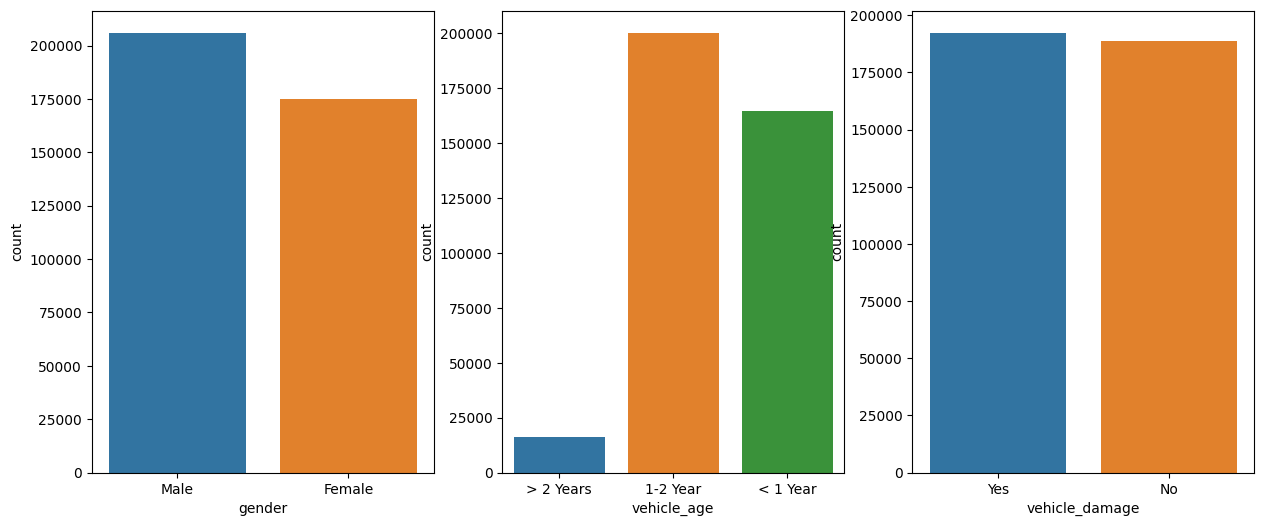

In [24]:
rcParams['figure.figsize'] = 15,6

plt.subplot(1,3,1);
sns.countplot(x='gender',data=df1);

plt.subplot(1,3,2);
sns.countplot(x='vehicle_age',data=df1);

plt.subplot(1,3,3);
sns.countplot(x='vehicle_damage',data=df1);

# **Step 2 Feature Engineering**

In [25]:
df2=df1.copy()

In [26]:
# vehicle age
df2['vehicle_age']=df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' 
                                            else 'between_1_2_years' if x == '1-2 Year'
                                            else 'below_1_year')

# vehicle damage
# df2['vehicle_damage']=df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

df2['previously_insured']=df2['previously_insured'].apply(lambda x: 'Yes' if x == 1 else 'No')

df2['driving_license']=df2['driving_license'].apply(lambda x: 'Yes' if x == 1 else 'No')

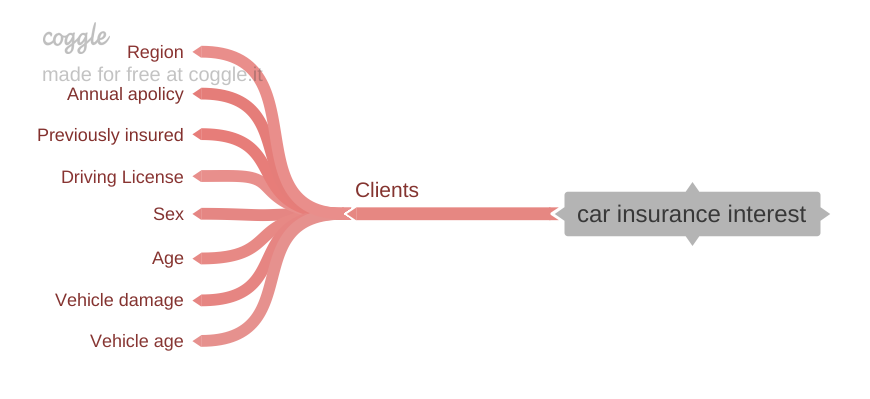

In [27]:
Image('../img/car_insurance_interest.png')

## **2.1 Hypothesis creation**

### **2.1.2 Clients**

**1** Quanto maior a apólice de saúde, maior a chance do interesse

**2** Se não tem seguro automotivo, maior chance de interesse

**3** Se tem carteira de motorista, maior chance de interesse

**4** Homens têm maior chance de se interessar

**5** Pessoas mais velhas têm mais chance de se interessar

**6** Proprietários de veículos mais novos têm maior chance de se interessar

**7** Pessoas que moram em regiões com mais acidentes e menos seguras têm mais chance de se interessar

**8** Pessoas há mais tempo associadas têm mais chance de se interessar

### **2.2 Feature engineering**

# **Step 3 Variable filtering**

In [28]:
df3=df2.copy()

## **3.1 Row filtering**

## **3.2 Column filtering**

# **Step 4 Exploratory data analysis**

In [30]:
df4=df3.copy()

## **4.1 Univariate analysis**

### **4.1.1 Response variable**

response
0    334399
1     46710
Name: count, dtype: int64

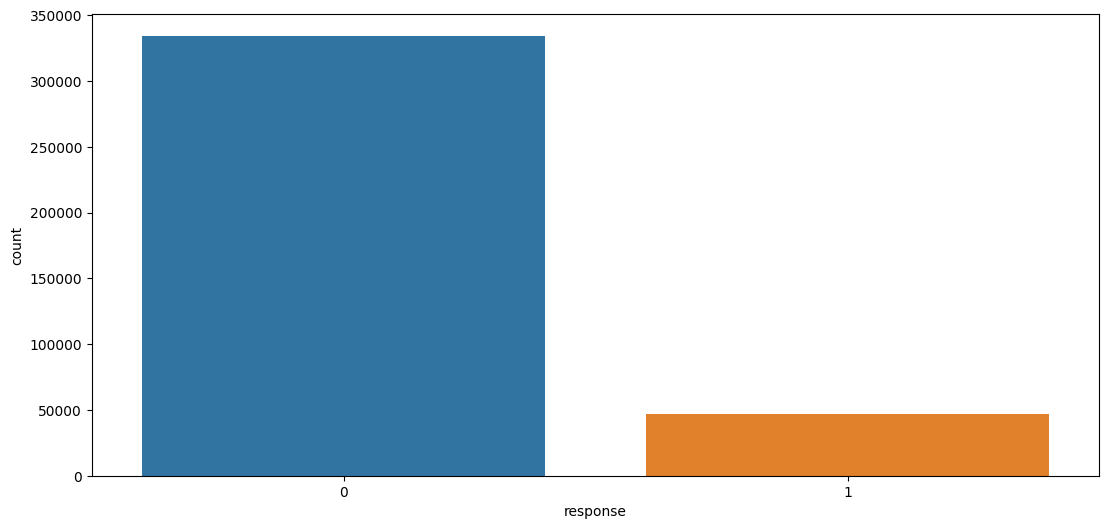

In [31]:
rcParams['figure.figsize'] = 13,6

sns.countplot(x='response',data=df4);
df4['response'].value_counts()

### **4.1.2 Numerical variables**

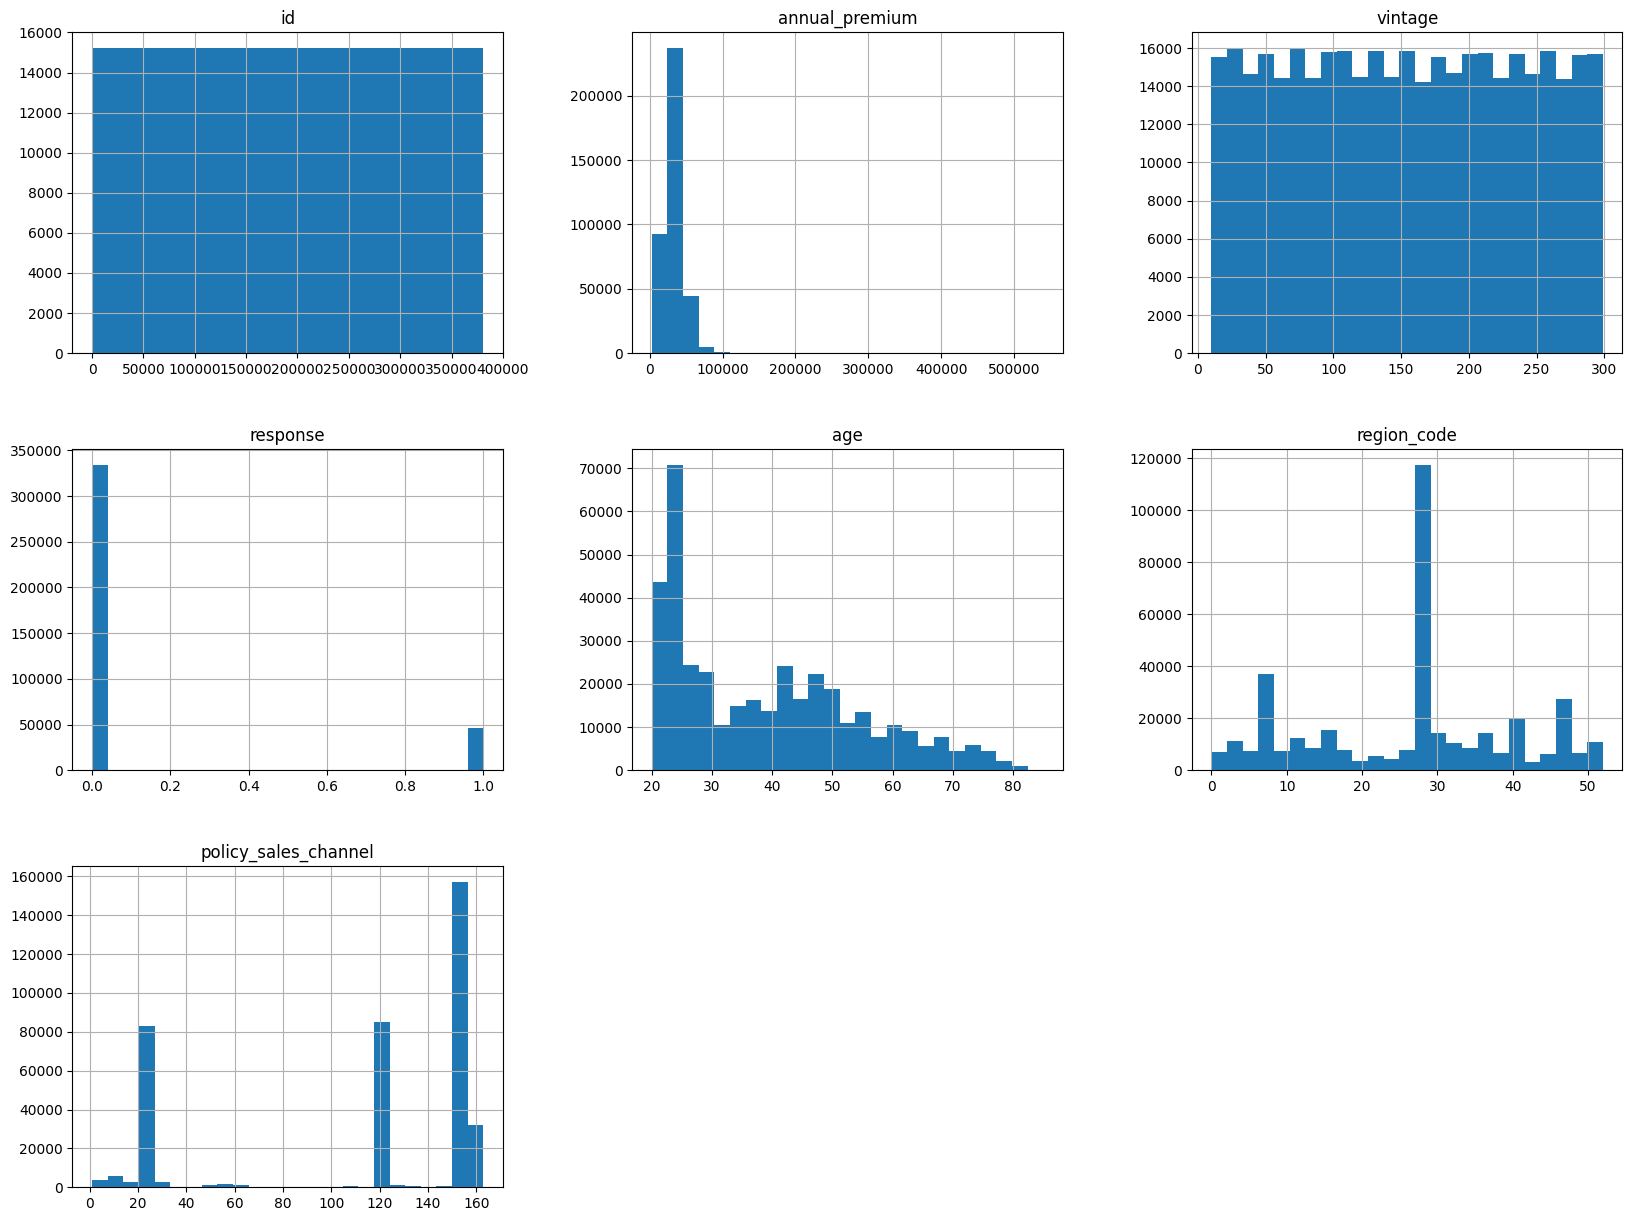

In [32]:
num_attributes = df4.select_dtypes(include=['int64','float64'])
cat_attributes = df4.select_dtypes(exclude=['int64','float64'])

rcParams['figure.figsize'] = 20,15
num_attributes.hist(bins=25);

### **4.1.3 Categorical variables**

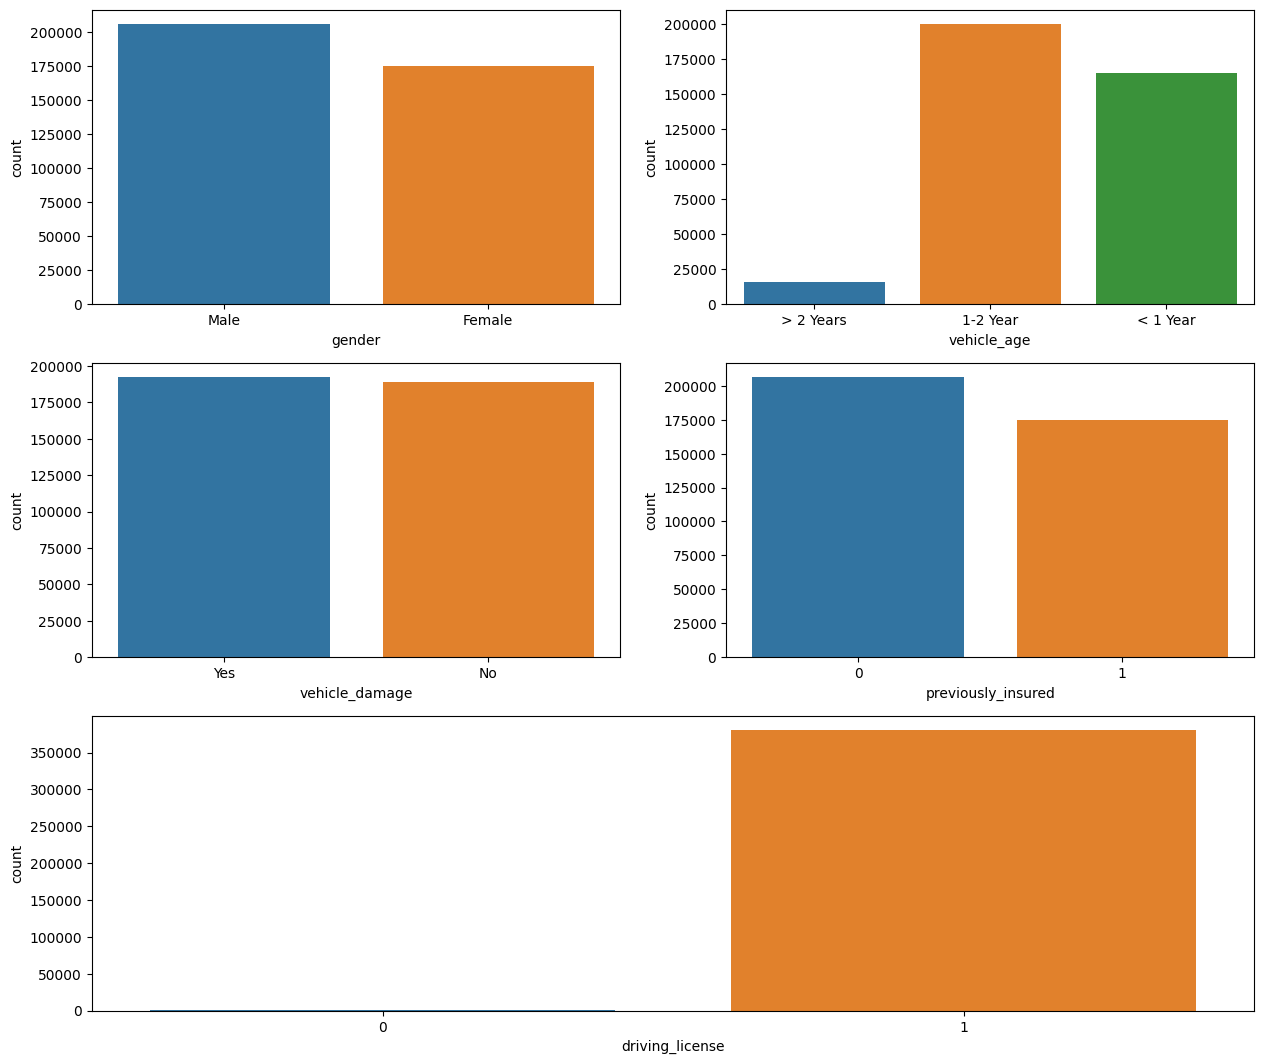

In [33]:
rcParams['figure.figsize'] = 15,13

grid=gridspec.GridSpec(3,2)

plt.subplot(grid[0,0])
# plt.subplot(1,3,1);
sns.countplot(x='gender',data=df1);

plt.subplot(grid[0,1])
# plt.subplot(1,3,2);
sns.countplot(x='vehicle_age',data=df1);

plt.subplot(grid[1,0])
# plt.subplot(1,3,3);
sns.countplot(x='vehicle_damage',data=df1);

plt.subplot(grid[1,1])
# plt.subplot(1,3,2);
sns.countplot(x='previously_insured',data=df1);

plt.subplot(grid[2,:])
# plt.subplot(1,3,3);
sns.countplot(x='driving_license',data=df1);

## **4.2 Bivariate analysis**


### **4.2.1 Annual_premium**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


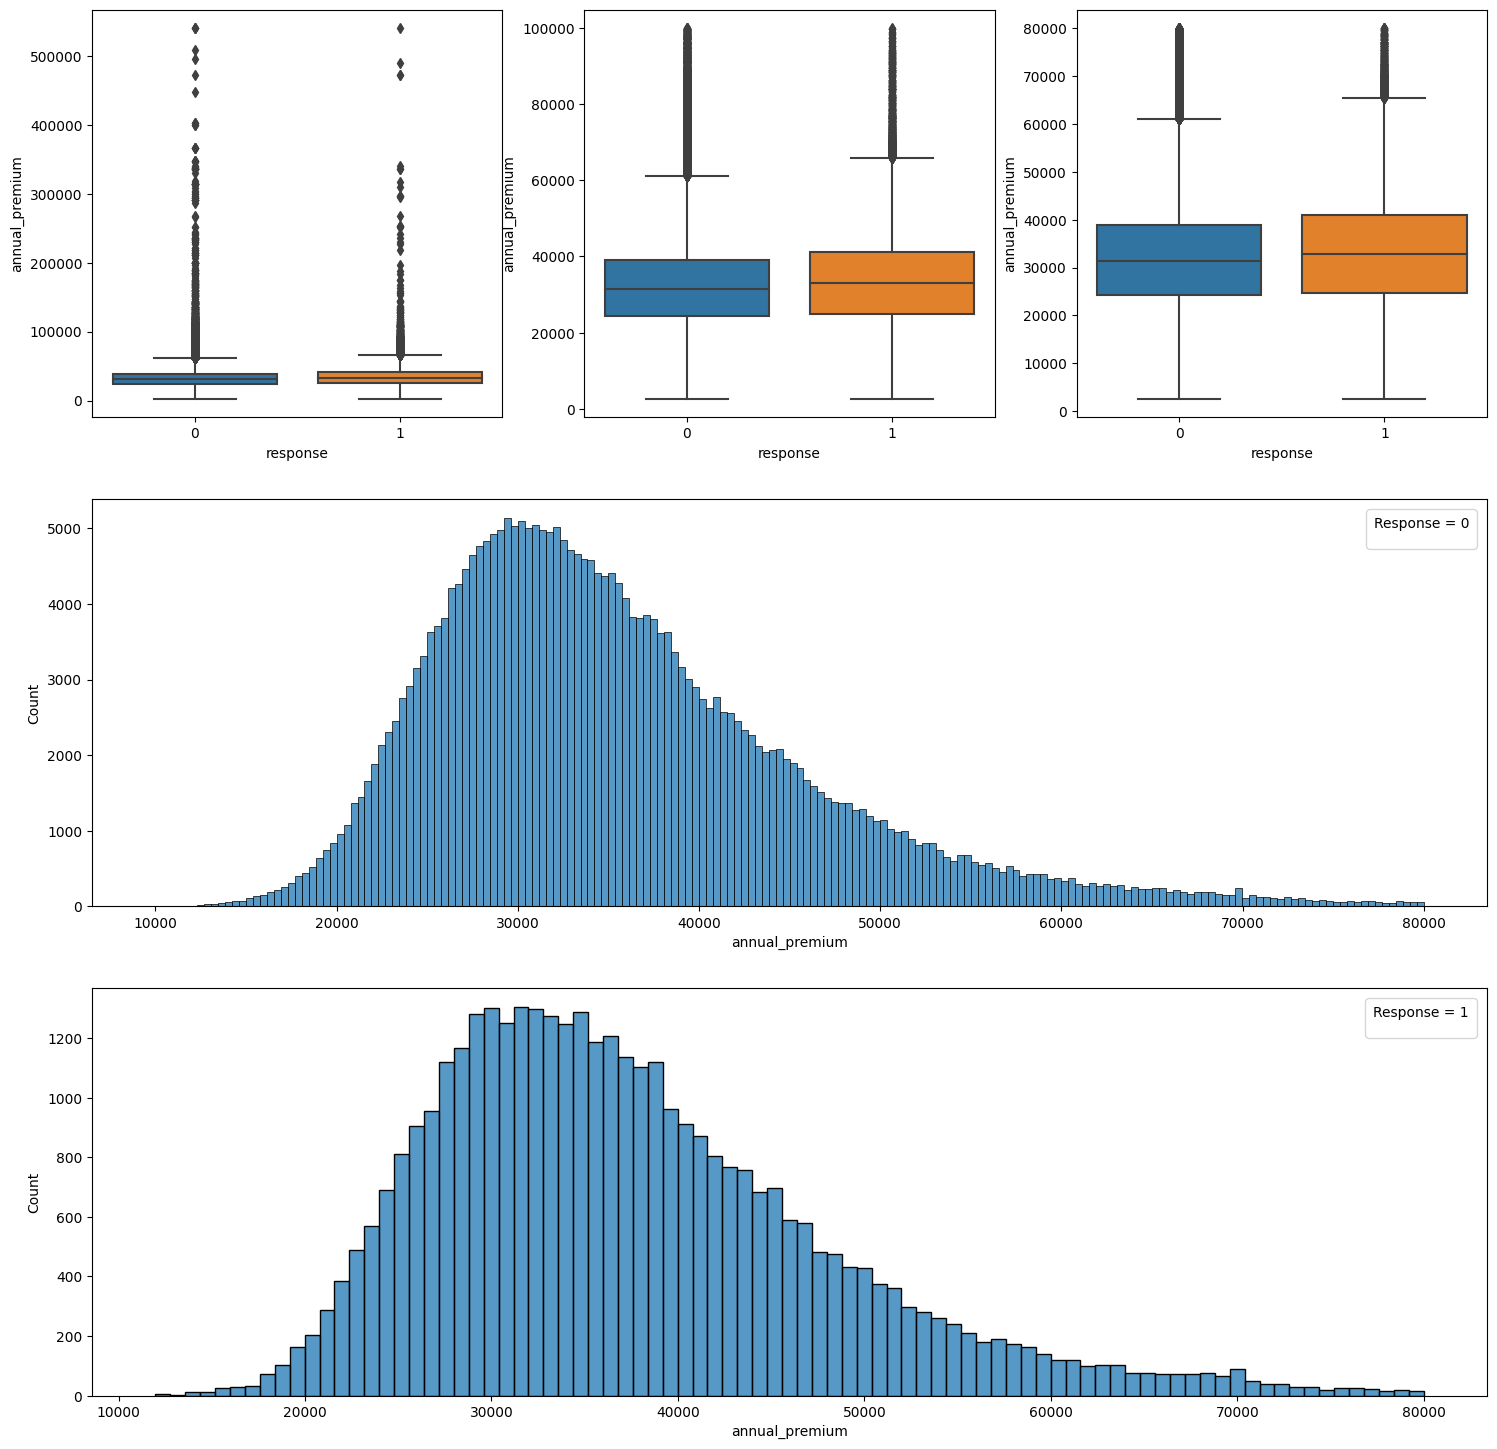

In [34]:
rcParams['figure.figsize'] = 18,18
grid=gridspec.GridSpec(3,3)


plt.subplot(grid[0,0])
sns.boxplot(x='response',y='annual_premium',data=df4); 

aux4=df4[df4['annual_premium'] < 100000]
plt.subplot(grid[0,1])
sns.boxplot(x='response',y='annual_premium',data=aux4);


aux4=df4[df4['annual_premium'] < 80000]
plt.subplot(grid[0,2])
sns.boxplot(x='response',y='annual_premium',data=aux4);


aux=df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
aux00=aux.loc[df4['response']==0,'annual_premium']     
plt.subplot(grid[1,:])

plt.legend(title='Response = 0', fontsize="x-large")
sns.histplot(aux00);

aux00=aux.loc[df4['response']==1,'annual_premium'] 
plt.subplot(grid[2,:])
plt.legend(title='Response = 1', fontsize="x-large")
sns.histplot(aux00);

### **4.2.2 Vintage**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


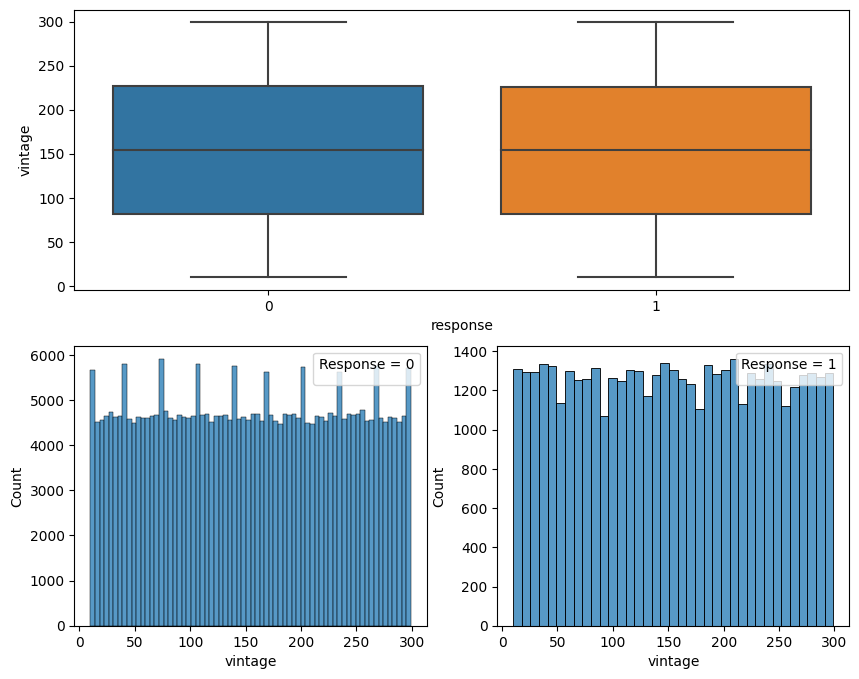

In [35]:
rcParams['figure.figsize'] = 10,8

grid=gridspec.GridSpec(2,2)

plt.subplot(grid[0,:])
sns.boxplot(x='response',y='vintage',data=df4);

plt.subplot(grid[1,0])
plt.legend(title='Response = 0')
sns.histplot(df4.loc[df4['response']==0,'vintage']);

plt.subplot(grid[1,1])
plt.legend(title='Response = 1')
sns.histplot(df4.loc[df4['response']==1,'vintage']);

### **4.2.3 Age**

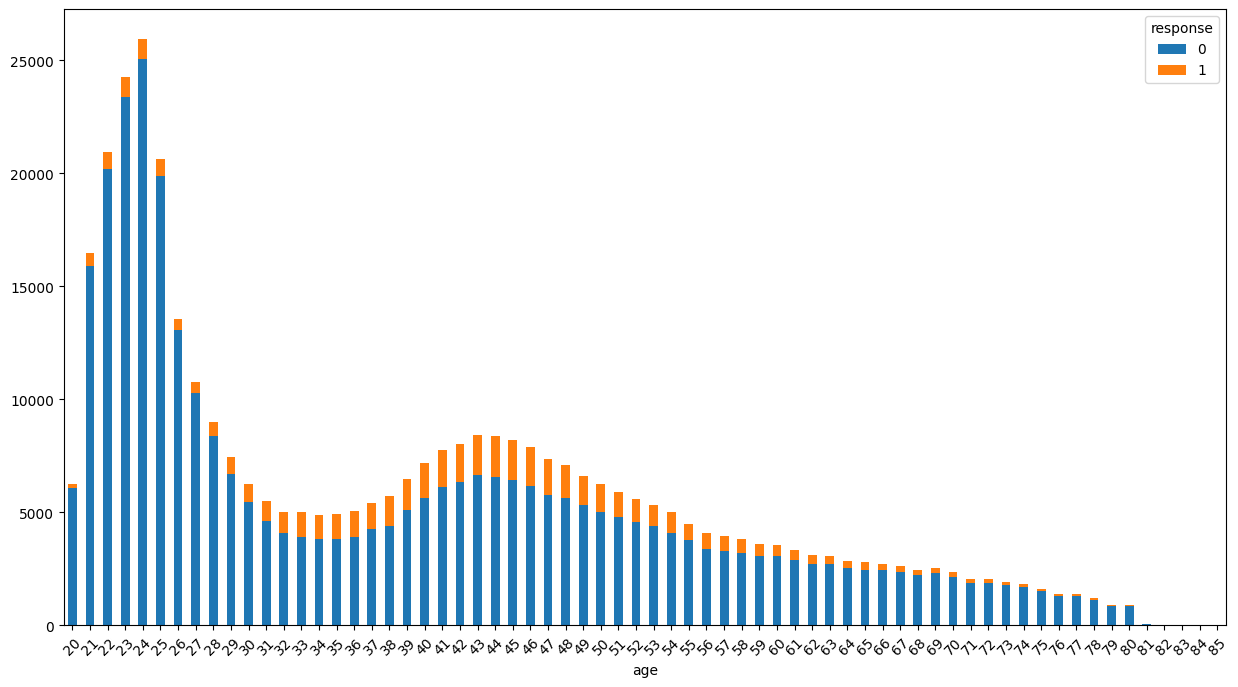

In [36]:
rcParams['figure.figsize'] = 15,8

# aux=df4[['id','age','response']].groupby(['age','response']).count().reset_index()
# sns.scatterplot(x='age',y='id',hue='response',data=aux);

crosstb=pd.crosstab(df4['age'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)
plt.xticks(rotation=45);

### **4.2.4 Region_code**

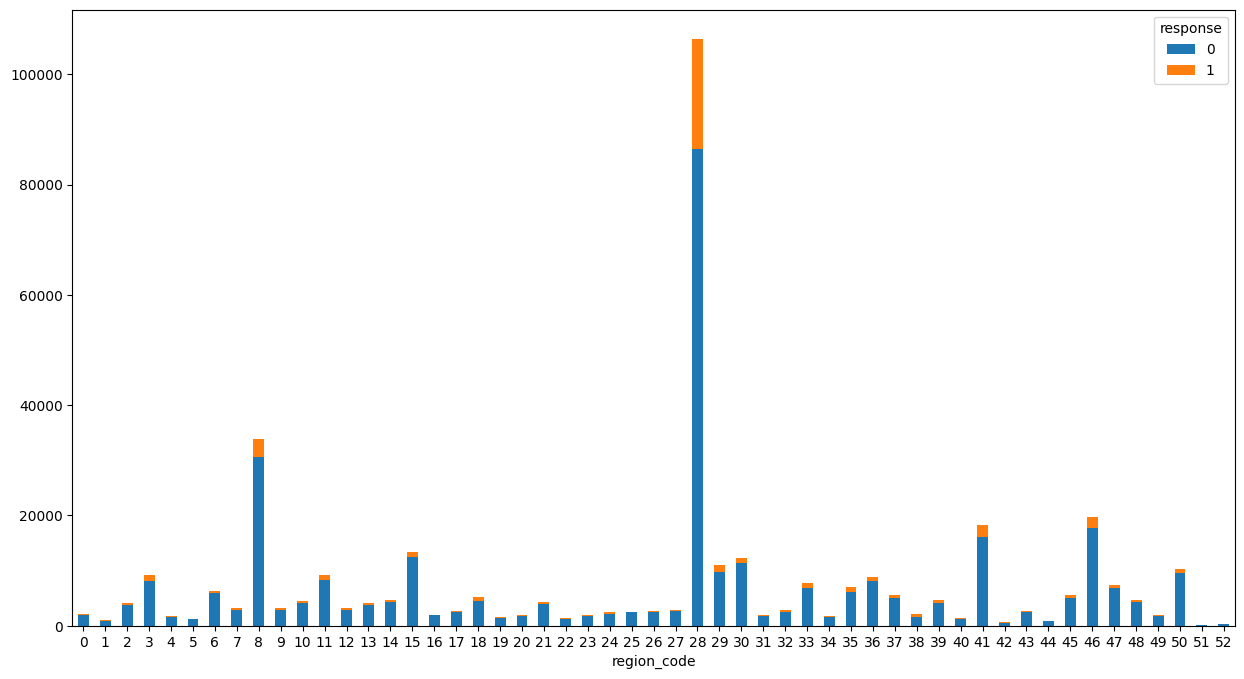

In [37]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['region_code'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

In [38]:
# rcParams['figure.figsize'] = 15,15

# grid=gridspec.GridSpec(2,2)

# plt.subplot(grid[0,:])
# aux0=df4[['id','region_code','response']].groupby(['region_code','response']).count().reset_index()
# sns.scatterplot(x='region_code',y='id',hue='response',data=aux0);

# # plt.subplot(grid[1,:])
# # sns.boxplot(x='response',y='region_code',data=df4);   # olhar a mediana/quartis/medianas de cada um dos grupos em relação a idade
# # 0 = 35 anos mediana, 1° ao 3° quartil : 25 a 50 anos


# plt.subplot(grid[1,0])
# aux00=df4.loc[df4['response']==0,'region_code']        # loc para passar a coluna como string
# plt.legend(title='Response = 0')
# sns.histplot(aux00);


# plt.subplot(grid[1,1])
# aux00=df4.loc[df4['response']==1,'region_code']        
# plt.legend(title='Response = 1')
# sns.histplot(aux00);

### **4.2.5 Policy_sales_channel**

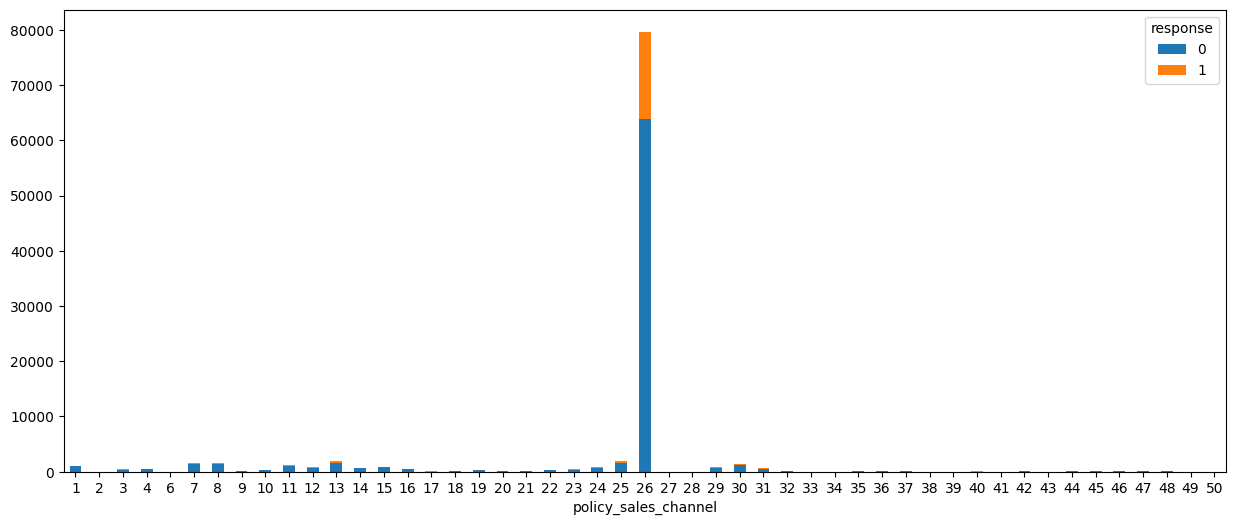

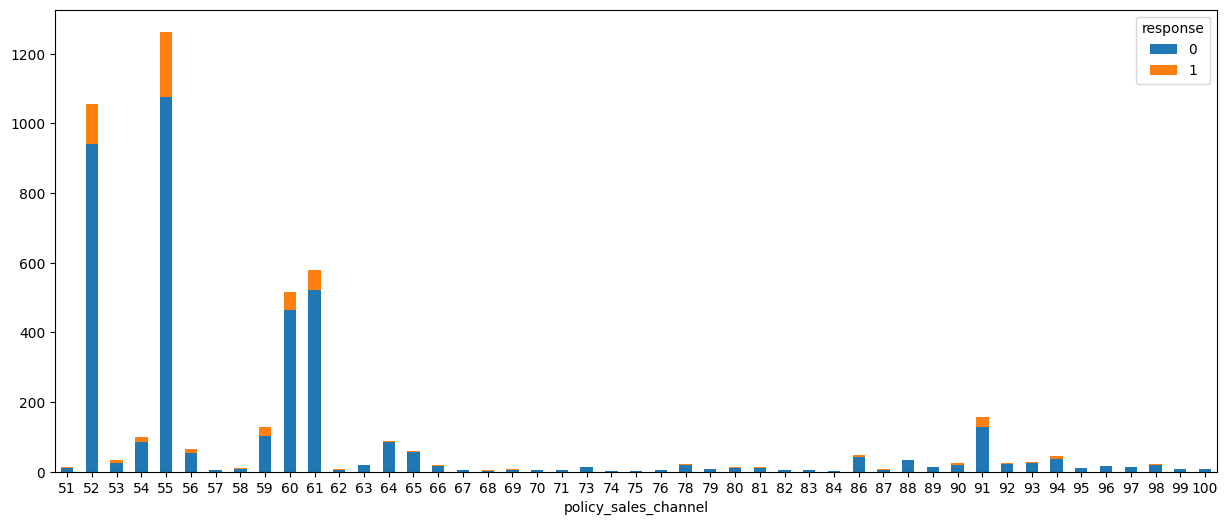

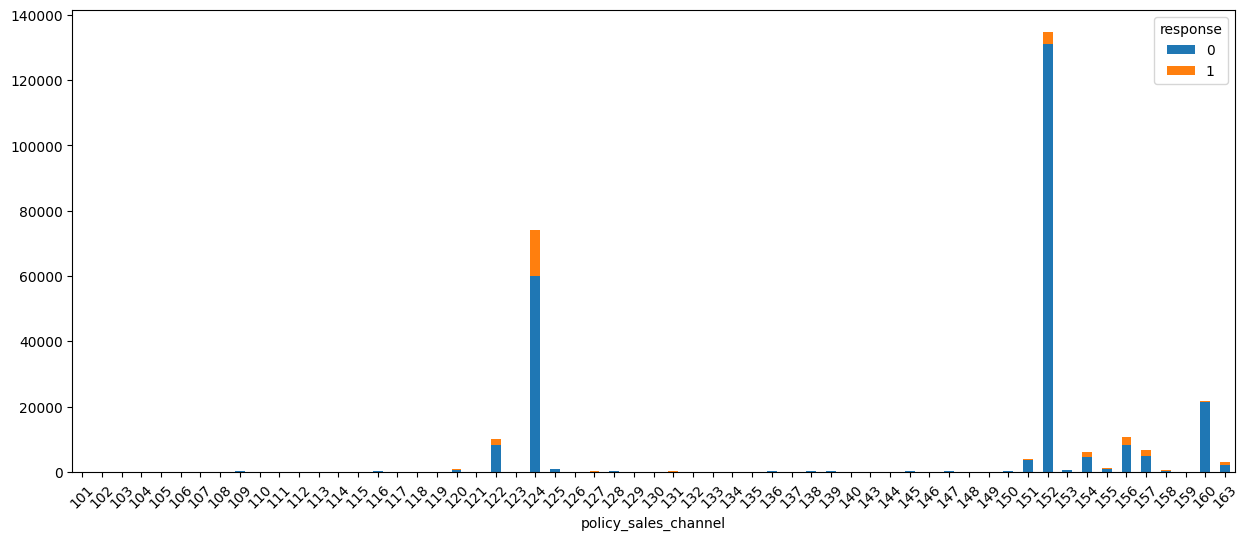

In [39]:
rcParams['figure.figsize'] = 15,6

aux=df4[df4['policy_sales_channel']<=50]
crosstb=pd.crosstab(aux['policy_sales_channel'],aux['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

aux1=df4[(df4['policy_sales_channel']>50) & (df4['policy_sales_channel']<=100)]
crosstb1=pd.crosstab(aux1['policy_sales_channel'],aux1['response'])
pl = crosstb1.plot(kind="bar", stacked=True, rot=0)


aux2=df4[df4['policy_sales_channel']>100]
crosstb2=pd.crosstab(aux2['policy_sales_channel'],aux2['response'])
pl = crosstb2.plot(kind="bar", stacked=True, rot=0)
plt.xticks(rotation=45);

In [40]:
# rcParams['figure.figsize'] = 15,8

# aux=df4[['policy_sales_channel','response']].groupby(['policy_sales_channel']).sum().reset_index()
# sns.barplot(x='response',y='policy_sales_channel',data=aux);
# plt.xticks(rotation=45);

# fazer o stacked percentage plot

### **4.2.6 Vehicle_age**

In [41]:
df4[['vehicle_age','response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,proportion
0,between_1_2_years,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_years,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


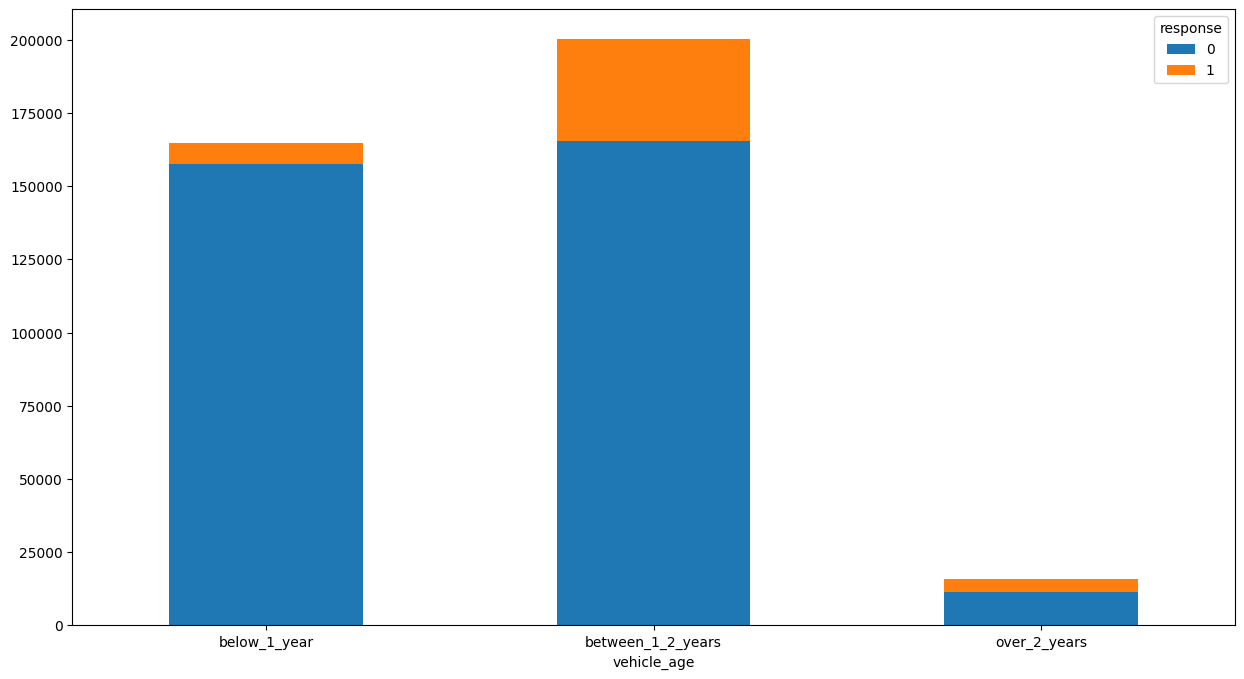

In [42]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['vehicle_age'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

### **4.2.7 Vehicle_damage**

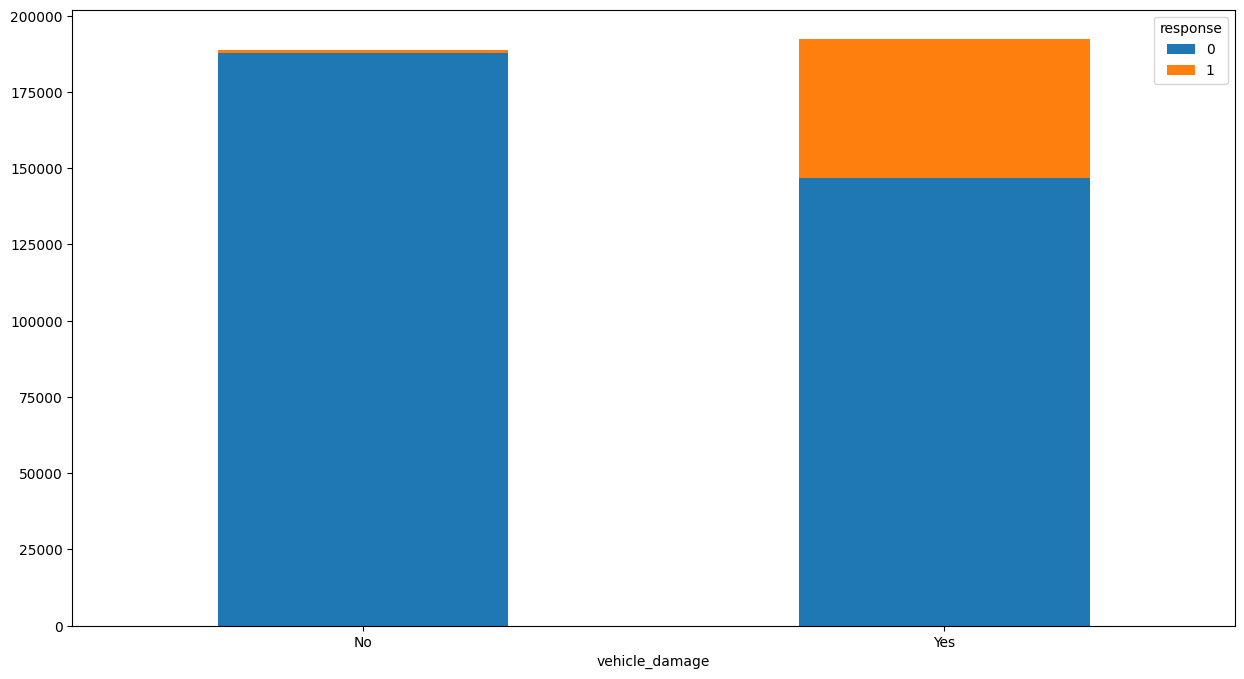

In [43]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['vehicle_damage'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

### **4.2.8 Previously_insured**

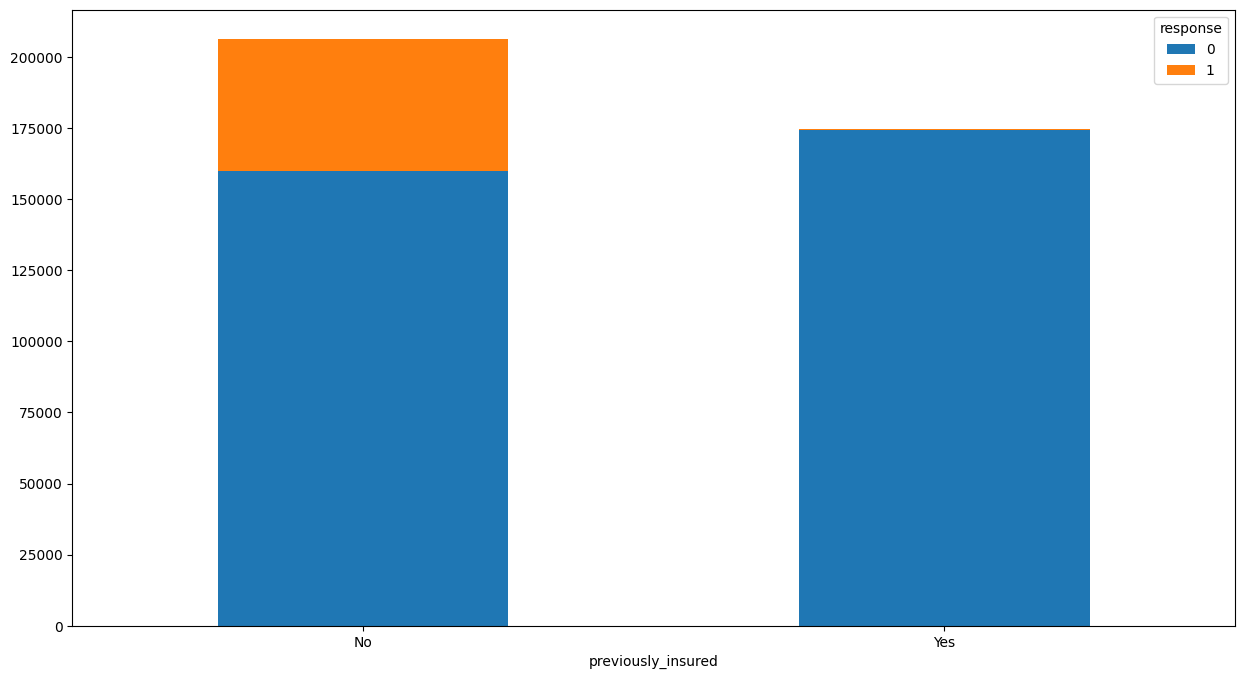

In [44]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['previously_insured'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

In [45]:
# pode ser um 'vazamento de dados' , pq é muito relacionado com a variável resposta (100% das pessoas q já tem, não querem), é como se fosse um if/else para o modelo

# pd.crosstab(df4['previously_insured'],df4['response']),'\n'

pd.crosstab(df4['previously_insured'],df4['response']).apply(lambda x: x /x.sum(), axis=1)

response,0,1
previously_insured,,
No,0.774546,0.225454
Yes,0.999095,0.000905


### **4.2.9 Driving_license**

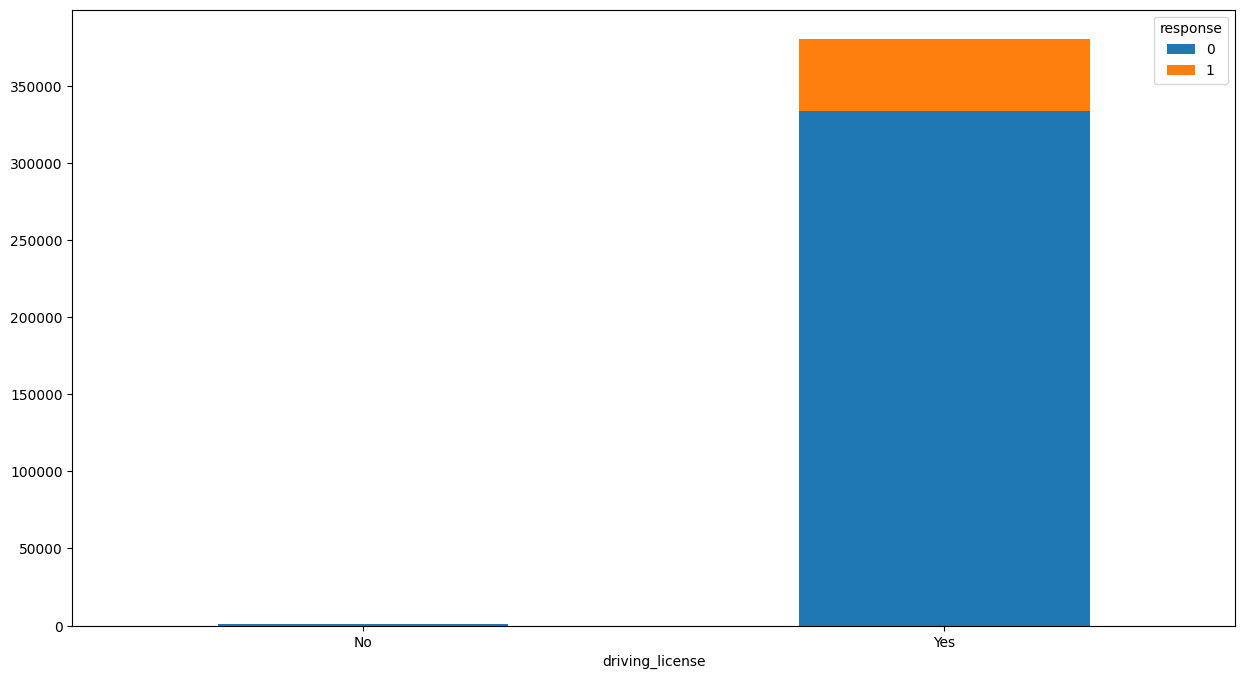

In [46]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['driving_license'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

In [47]:
pd.crosstab(df4['driving_license'],df4['response']).apply(lambda x: x /x.sum(), axis=1)

response,0,1
driving_license,,
No,0.949507,0.050493
Yes,0.877283,0.122717


In [48]:
# plt.subplot(1,2,1)
# sns.countplot(df4['driving_license'])
# plt.subplot(2,2,2)
# aux1 = df4[['driving_license', 'response']].groupby( 'driving_license' ).sum().sort_values('response',ascending=False).reset_index()
# sns.barplot( x='driving_license', y='response', data=aux1 );

In [49]:
# soma agregada
# aux=df4[['driving_license','response']].groupby('response').sum().reset_index()
# # sns.barplot(x='response',y='driving_license',data=aux);

# aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
# aux

# 87% das pessoas que dirigem não querem o seguro = a variável é discriminativa porém precisa de outra junto

In [59]:
# print(pd.crosstab(df4['driving_license'],df4['response']),'\n')
# print(pd.crosstab(df4['driving_license'],df4['response']).apply(lambda x: x /x.sum(), axis=1))

## **hypos**

**1** Quanto maior a apólice de saúde, maior a chance do interesse

**2** Se não tem seguro automotivo, maior chance de interesse

**3** Homens têm maior chance de se interessar

**4** Pessoas mais velhas têm mais chance de se interessar

**5** Proprietários de veículos mais novos têm maior chance de se interessar

**6** Pessoas que moram em regiões com mais acidentes e menos seguras têm mais chance de se interessar

**7** Pessoas há mais tempo associadas têm mais chance de se interessar

### **H1 Quanto maior a apólice de saúde, maior a chance do interesse**

    falso

In [60]:
# print(df4['annual_premium'].value_counts().head(5))
# aux1=df4[['annual_premium','response']].groupby('annual_premium').sum().sort_values('response',ascending=False).reset_index()
# print(aux1.head())

In [61]:
# plt.subplot(1,2,1)
# sns.boxplot(x='response',y='annual_premium',data=df4);

# plt.subplot(1,2,2)
# x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );

### **H2 Se não tem seguro automotivo, maior chance de interesse**

    verdadeiro

In [62]:
# aux2 = df4[['previously_insured', 'response']].groupby( 'previously_insured' ).sum().reset_index()
# aux2

In [63]:
# plt.subplot( 1, 3, 1 )
# aux2.hist(bins=25);
# # df4['previously_insured'].hist(bins=25);

# plt.subplot( 1, 3, 1 )
# df4['previously_insured'].hist(bins=25);

# plt.subplot( 1, 3, 2 )
# sns.barplot( x='previously_insured', y='response', data=aux2 );

# plt.subplot( 1, 3, 3 )
# x = sns.heatmap( aux2.corr( method='pearson' ), annot=True );
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );

### **H3 Homens têm maior chance de se interessar**

    verdadeiro

In [64]:
# aux3 = df4[['gender', 'response']].groupby( 'gender' ).sum().reset_index()
# aux3

In [65]:
# plt.subplot( 1, 2, 1 )
# df4['gender'].hist(bins=25);


# plt.subplot( 1, 2, 2 )
# sns.barplot( x='gender', y='response', data=aux3 );


# plt.subplot( 1, 3, 3 )
# x = sns.heatmap( aux3.corr( method='pearson' ), annot=True );
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );

### **H4 Pessoas mais velhas têm mais chance de se interessar**


    verdadeiro

In [66]:
# df4['age'].value_counts().head(20)
# aux4=df4[['age','response']].groupby('age').sum().sort_values('response',ascending=False).reset_index()
# aux4.head()

In [67]:
# plt.subplot( 1, 2, 1 )
# df4['age'].hist(bins=25);


# plt.subplot( 1, 2, 2 )
# sns.barplot( x='age', y='response', data=aux4 );
# plt.xticks( rotation=5 )


# plt.figure()
# x = sns.heatmap( aux4.corr( method='pearson' ), annot=True );
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );

In [68]:
# sns.boxplot(x='response',y='age',data=df4)

### **H5 Proprietários de veículos mais novos têm maior chance de se interessar**

In [69]:
# df4['vehicle_age'].value_counts()
# aux5=df4[['response','vehicle_age']].groupby('vehicle_age').sum().reset_index()
# aux5

In [70]:
# fig, (ax1,ax2) = plt.subplots(1,2)
# labels = '1-2 year', '< 1 year', '> 2 years'
# sizes = [200316, 164786, 16007]
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors);


# labels = '1-2 year', '< 1 year', '> 2 years'
# sizes = [34806, 7202, 4702]
# ax2.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors);


# plt.tight_layout()

### **H6 Pessoas que moram em regiões com mais acidentes e menos seguras têm mais chance de se interessar**

    falso

In [71]:
# df4['region_code'].value_counts().head(10)

In [72]:
# aux6=df4[['response','region_code']].groupby('region_code').sum().sort_values('response',ascending=False).reset_index()
# aux6.head(10)

In [73]:
# plt.subplot( 1, 2, 1 )
# df4['region_code'].hist(bins=25);

# plt.subplot( 1, 2, 2 )
# sns.barplot( x='region_code', y='response', data=aux6 );
# plt.xticks( rotation=5 );

# plt.figure()
# x = sns.heatmap( aux6.corr( method='pearson' ), annot=True );
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );

### **H7 Pessoas há mais tempo associadas têm mais chance de se interessar**

    falsa

In [74]:
# df4['vintage'].value_counts().head(10)

In [75]:
# aux7=df4[['response','vintage']].groupby('vintage').sum().sort_values('response',ascending=False).reset_index()
# aux7.head(10)

In [76]:
# sns.boxplot(x='response',y='vintage',data=df4);

In [77]:
# plt.subplot( 1, 3, 1 )
# df4['vintage'].hist(bins=25);

# plt.subplot( 1, 3, 2 )
# sns.barplot( x='vintage', y='response', data=aux7 );

# plt.subplot( 1, 3, 3 )
# x = sns.heatmap( aux7.corr( method='pearson' ), annot=True );
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );

### **4.2.1 Resumo das hipóteses**

## **4.3 Multivariate analysis**

### **4.3.1 Numerical attributes**

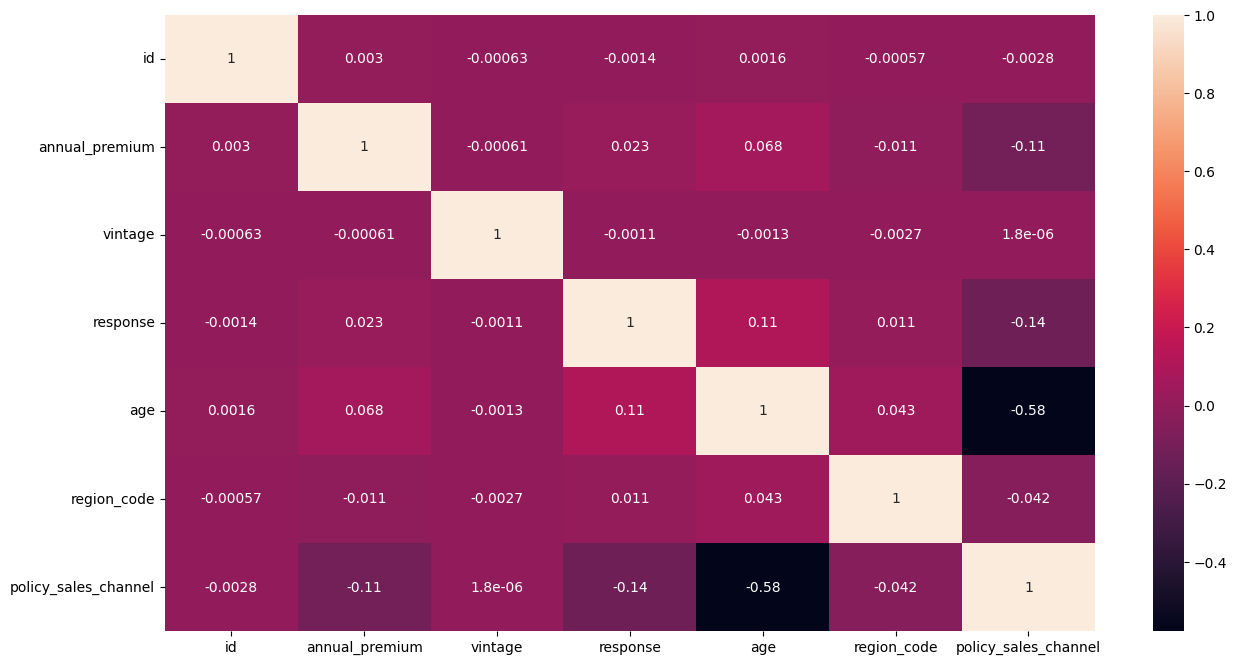

In [78]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

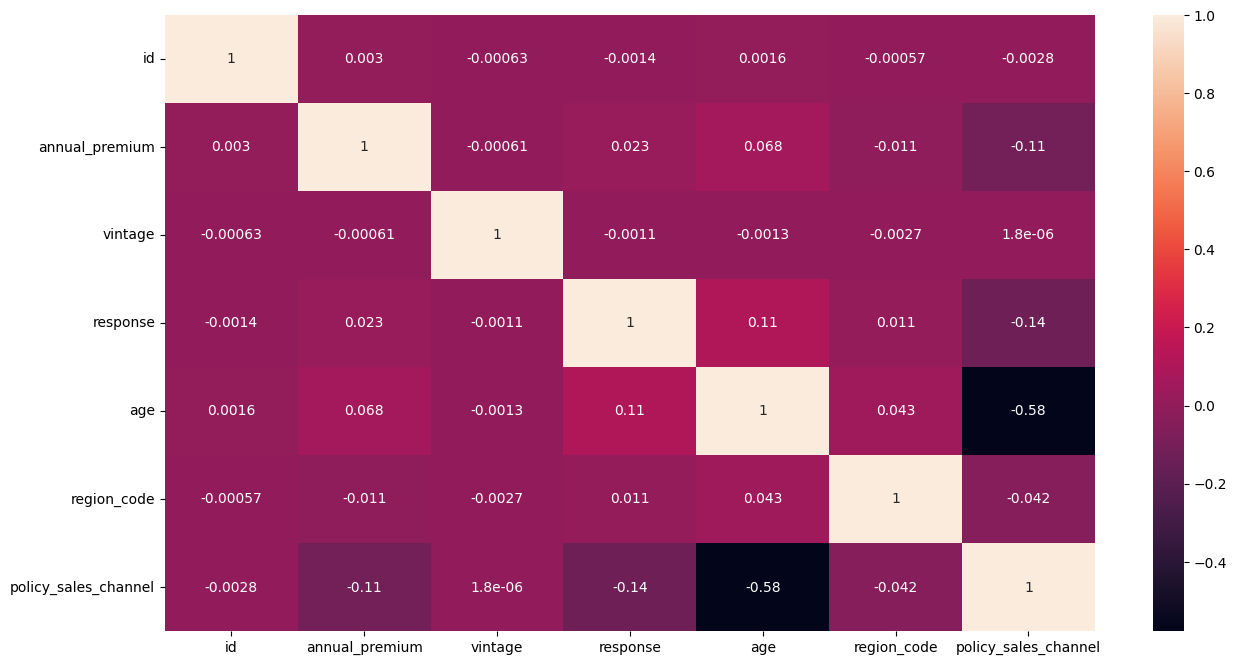

In [79]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

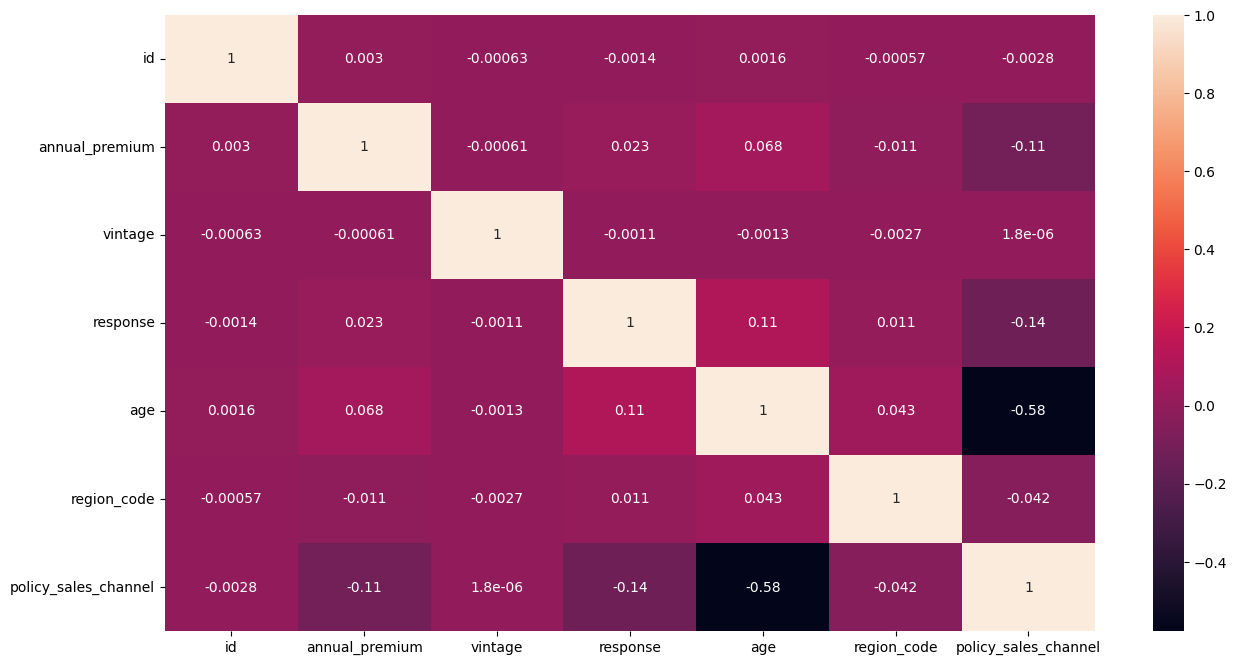

In [80]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

### **4.3.2 Categorical attributes**

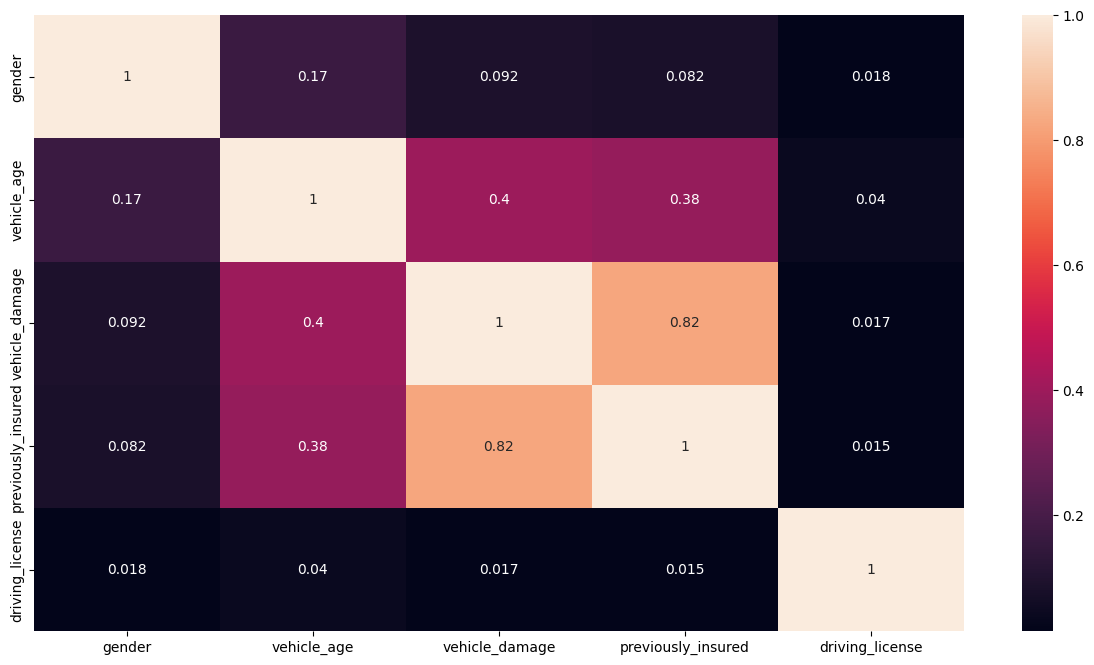

In [81]:
# only categorical data
a = df4.select_dtypes( include='object' )

# Calculate cramer V
a1 = cramer_v( a['gender'], a['gender'] )
a2 = cramer_v( a['gender'], a['vehicle_age'] )
a3 = cramer_v( a['gender'], a['vehicle_damage'] )
a4 = cramer_v( a['gender'], a['previously_insured'] )
a5 = cramer_v( a['gender'], a['driving_license'] )

a6 = cramer_v( a['vehicle_age'], a['gender'] )
a7 = cramer_v( a['vehicle_age'], a['vehicle_age'] )
a8 = cramer_v( a['vehicle_age'], a['vehicle_damage'] )
a9 = cramer_v( a['vehicle_age'], a['previously_insured'] )
a10 = cramer_v( a['vehicle_age'], a['driving_license'] )

a11 = cramer_v( a['vehicle_damage'], a['gender'] )
a12 = cramer_v( a['vehicle_damage'], a['vehicle_age'] )
a13 = cramer_v( a['vehicle_damage'], a['vehicle_damage'] )
a14 = cramer_v( a['vehicle_damage'], a['previously_insured'] )
a15 = cramer_v( a['vehicle_damage'], a['driving_license'] )

a16 = cramer_v( a['previously_insured'], a['gender'] )
a17 = cramer_v( a['previously_insured'], a['vehicle_age'] )
a18 = cramer_v( a['previously_insured'], a['vehicle_damage'] )
a19 = cramer_v( a['previously_insured'], a['previously_insured'] )
a20 = cramer_v( a['previously_insured'], a['driving_license'] )

a21 = cramer_v( a['driving_license'], a['gender'] )
a22 = cramer_v( a['driving_license'], a['vehicle_age'] )
a23 = cramer_v( a['driving_license'], a['vehicle_damage'] )
a24 = cramer_v( a['driving_license'], a['previously_insured'] )
a25 = cramer_v( a['driving_license'], a['driving_license'] )

# Final dataset
d = pd.DataFrame( {'gender':          [a1, a2, a3, a4, a5], 
                   'vehicle_age':     [a6, a7, a8, a9, a10],
                   'vehicle_damage':  [a11, a12, a13, a14, a15],  
                'previously_insured': [a16, a17, a18, a19, a20],
                   'driving_license': [a21, a22, a23, a24, a25]})

d = d.set_index( d.columns )

sns.heatmap( d, annot=True );

# **Step 5 Data preparation**

In [119]:
df4=pd.read_csv('df4',low_memory=False)
df5=df4.copy()

In [120]:
# encontrar o poder de generalização pq vai usar dados q o modelo nunca viu

X=df5.drop('response',axis=1)
y=df5['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(X,y,test_size=0.20)

df5=pd.concat ([x_train, y_train], axis=1) # se torna o dataset de treino

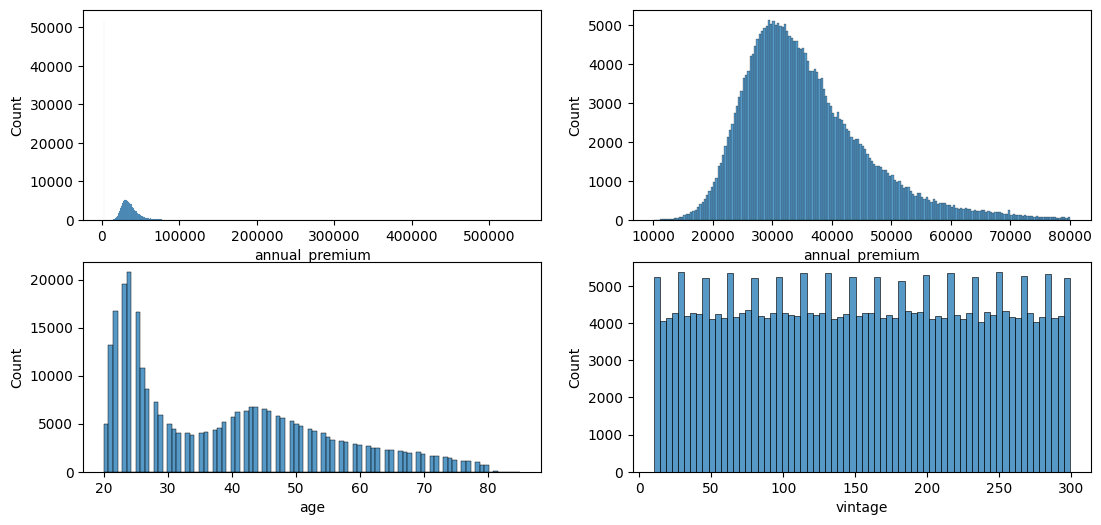

In [121]:
rcParams['figure.figsize'] = 13,6

plt.subplot(2,2,1)
sns.histplot(df5['annual_premium']);

plt.subplot(2,2,2)
aux=df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
aux00=aux.loc[df4['response']==0,'annual_premium']        
sns.histplot(aux00);

plt.subplot(2,2,3)
sns.histplot(df5['age']); # plota a predominância ( 25 mil exemplos [não interessados])
# não é próxima de uma normal, por isso rescaling

plt.subplot(2,2,4)
sns.histplot(df5['vintage']);
# não possue distribuição

## **5.1 Standardization**

In [122]:
# ANNUAL_PREMIUM

ss=pp.StandardScaler()
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values) # duplo colchetes p/ pegar o array -sempre passar como array nos encoders

## **5.2 Rescaling**

In [123]:
# AGE

mms_age=pp.MinMaxScaler()

df5['age']=mms_age.fit_transform(df5[['age']].values)

# VINTAGE

mms_vintage=pp.MinMaxScaler()
df5['vintage']=mms_vintage.fit_transform(df5[['vintage']].values)

## **5.3 Encoder**

In [124]:
# GENDER

# one hot encoding/target encoding

# target_encode_gender=df5.groupby('gender')['response'].mean()
# df5.loc[:,'gender']=df5['gender'].map(target_encode_gender)

df5=pd.get_dummies(df5,prefix='gender',columns=['gender'])


# REGION_CODE

#  frequency encoding / target encoding / weighted target encoding

# para variáveis categórias com muitos níveis (acima de 6 ou 7) não usar one hot encoding para não aumentar muito a dimensionalidade
# dica do meigarom é usar target encoding
# target encoding = mean encoding

target_encode_region_code=df5.groupby('region_code')['response'].mean()
df5.loc[:,'region_code']=df5['region_code'].map(target_encode_region_code)  # mapear a representatividade em termos de frequência


# VEHICLE_AGE

# pode usar order encoding/one hot encoding/frequency encoding, correndo o risco de desconsiderar carros com 2 meses ou 15 meses por exemplo
# get dummies do pandas = one hot encoding, dummies é melhor por já entregar as colunas mapeadas

df5=pd.get_dummies(df5,prefix='vehicle_age',columns=['vehicle_age'])


# POLICY_SALES_CHANNEL

# target encoding/frequency encoding

fe_policy_sales_channel=df5.groupby('policy_sales_channel').size()/len(df5)  # (quantos exemplos por agrupamento e dividir pelo dataset inteiro p/atribuir o peso dessa variávael
# em relação à base inteira)
df5.loc[:,'policy_sales_channel']=df5['policy_sales_channel'].map(fe_policy_sales_channel)


# PREVIOUSLY_INSURED

df5['previously_insured']=df5['previously_insured'].apply(lambda x: 1 if x == 'Yes' else 0)


# DRIVING_LICENSE

df5['driving_license']=df5['driving_license'].apply(lambda x: 1 if x == 'Yes' else 0)


# VEHICLE_DAMAGE

df5['vehicle_damage']=df5['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

## **5.4 Validation(test) preparation**

In [125]:
# x_validation=test.copy()

# x_validation.columns= x_validation.columns.str.lower()

# x_validation['vehicle_age']=x_validation['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' 
#                                             else 'between_1_2_years' if x == '1-2 Year'
#                                             else 'below_1_year')

# x_validation['previously_insured']=x_validation['previously_insured'].apply(lambda x: 'Yes' if x == 1 else 'No')

# x_validation['driving_license']=x_validation['driving_license'].apply(lambda x: 'Yes' if x == 1 else 'No')


# # annual_premium
# ss=pp.StandardScaler()
# x_validation['annual_premium']=ss.fit_transform(x_validation[['annual_premium']].values)


# # age
# mms=pp.MinMaxScaler()
# x_validation['age']=mms.fit_transform(x_validation[['age']].values)


# # vintage
# mms=pp.MinMaxScaler()
# x_validation['vintage']=mms.fit_transform(x_validation[['vintage']].values)


# # gender
# # x_validation['gender']=x_validation['gender'].map(target_encode_gender)
# x_validation=pd.get_dummies(x_validation,prefix='gender',columns=['gender'])


# # region_code
# x_validation['region_code']=x_validation['region_code'].map(target_encode_region_code) 
# # target_encode_region_code=x_validation.groupby('region_code')['response'].mean()
# # x_validation.loc[:,'region_code']=x_validation['region_code'].map(target_encode_region_code) 

# # vehicle_age
# x_validation=pd.get_dummies(x_validation,prefix='vehicle_age',columns=['vehicle_age'])


# # policy_sales_channel
# x_validation['policy_sales_channel']=x_validation['policy_sales_channel'].map(fe_policy_sales_channel)
# # fe_policy_sales_channel=x_validation.groupby('policy_sales_channel').size()/len(x_validation)  # (quantos exemplos por agrupamento e dividir pelo dataset inteiro p/atribuir o peso dessa variávael
# # # em relação à base inteira)
# # x_validation.loc[:,'policy_sales_channel']=x_validation['policy_sales_channel'].map(fe_policy_sales_channel)

# # previously_insured
# x_validation['previously_insured']=x_validation['previously_insured'].apply(lambda x: 1 if x == 'Yes' else 0)


# # driving_license
# x_validation['driving_license']=x_validation['driving_license'].apply(lambda x: 1 if x == 'Yes' else 0)


# # vehicle_damage
# x_validation['vehicle_damage']=x_validation['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)


# # fillna
# x_validation=x_validation.fillna(0) # tem regiões (region_code) no teste q n estão no treino

In [126]:
# annual_premium
x_validation.loc[:,'annual_premium']=ss.transform(x_validation[['annual_premium']].values)


# age
x_validation.loc[:,'age']=mms_age.transform(x_validation[['age']].values)


# vintage
x_validation.loc[:,'vintage']=mms_vintage.transform(x_validation[['vintage']].values)


# gender
# x_validation.loc[:,'gender']=x_validation.loc[:,'gender'].map(target_encode_gender)
x_validation=pd.get_dummies(x_validation,prefix='gender',columns=['gender'])


# region_code
x_validation.loc[:,'region_code']=x_validation.loc[:,'region_code'].map(target_encode_region_code) 


# vehicle_age
x_validation=pd.get_dummies(x_validation,prefix='vehicle_age',columns=['vehicle_age'])


# policy_sales_channel
x_validation.loc[:,'policy_sales_channel']=x_validation['policy_sales_channel'].map(fe_policy_sales_channel)


# previously_insured
x_validation['previously_insured']=x_validation['previously_insured'].apply(lambda x: 1 if x == 'Yes' else 0)


# policy_sales_channel
x_validation['driving_license']=x_validation['driving_license'].apply(lambda x: 1 if x == 'Yes' else 0)


# policy_sales_channel
x_validation['vehicle_damage']=x_validation['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)


# fillna
x_validation=x_validation.fillna(0) # tem regiões (region_code) no teste q n estão no treino

# **Step 6 Feature Selection**

In [127]:
df6=df5.copy()

## **6.1 Feature importance**

In [23]:
# model definition
forest=en.ExtraTreesClassifier(n_estimators=250,random_state=0,n_jobs=-1) 

# recebe os dados de treino e a variável resposta
# data preparation
x_train_n=df6.drop(['id','response'],axis=1)
y_train_n=y_train.values
forest.fit(x_train_n,y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking
                         feature  importance
0                        vintage    0.272644
0                 annual_premium    0.244569
0                            age    0.167744
0                    region_code    0.106285
0                 vehicle_damage    0.073512
0           policy_sales_channel    0.061830
0             previously_insured    0.049459
0       vehicle_age_below_1_year    0.012883
0  vehicle_age_between_1_2_years    0.006383
0       vehicle_age_over_2_years    0.002438
0                  gender_Female    0.000888
0                    gender_Male    0.000886
0                driving_license    0.000479


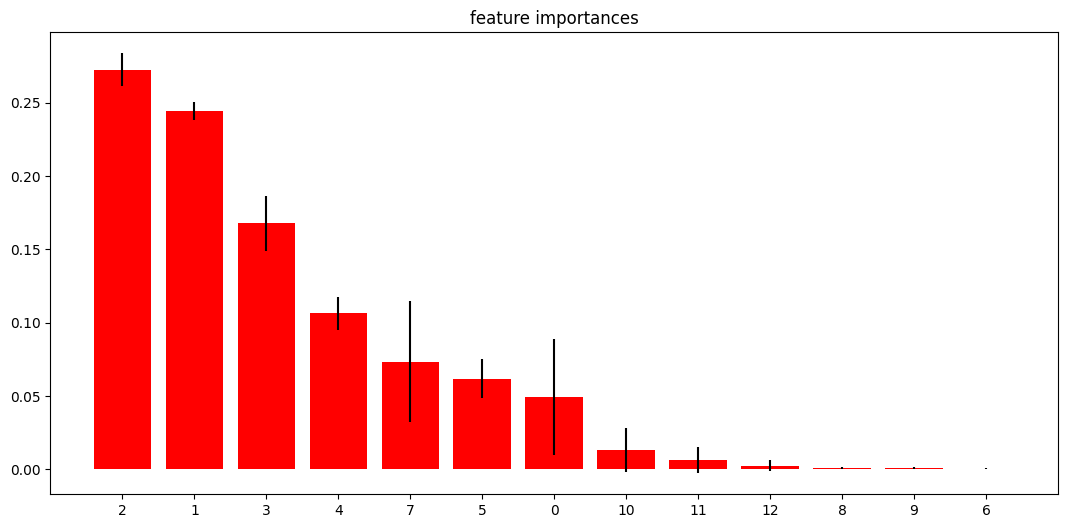

In [24]:
importances=forest.feature_importances_
std=np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices=np.argsort(importances)[::-1]  # índice é a importância das árvores ornada pelo maior valor

# print the feature ranking
print('Feature ranking')
df=pd.DataFrame()
for i, j in zip(x_train_n,forest.feature_importances_): # zip é pra arrumar as colunas com os valores
    aux=pd.DataFrame({'feature':i,'importance':j},index=[0])
    df=pd.concat([df,aux],axis=0)
    
print(df.sort_values('importance',ascending=False))

# plot the imputiry-based feature importances of the forest
plt.figure()
plt.title('feature importances')
plt.bar(range(x_train_n.shape[1]),importances[indices],color='r',yerr=std[indices],align='center')
plt.xticks(range(x_train_n.shape[1]),indices)
plt.xlim([-1,x_train_n.shape[1]])
plt.show()

# **Step 7 Machine learning**

In [128]:
df7=df6.copy()

In [129]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

x_train = df7[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation

## **7.1 Logistic regression**

              precision    recall  f1-score   support

           0     0.8787    1.0000    0.9354     66977
           1     0.0000    0.0000    0.0000      9245

    accuracy                         0.8787     76222
   macro avg     0.4394    0.5000    0.4677     76222
weighted avg     0.7721    0.8787    0.8220     76222

Precision at 20% 0.3333333333333333 

Precision at 50% 0.29411764705882354 

Recall at 20% 0.0007571660356949703 

Recall at 50% 0.0016224986479177934 

Top k accuracy_score 76222


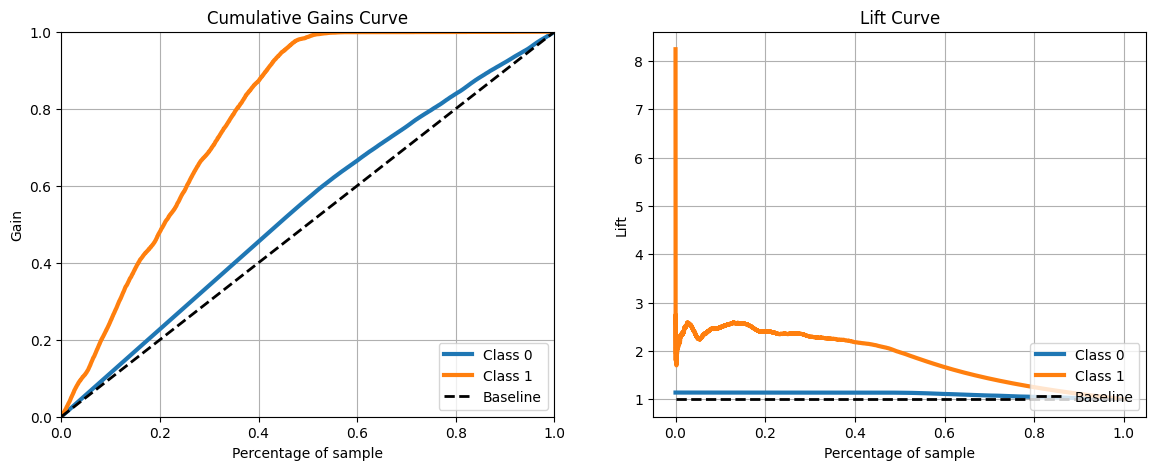

In [138]:
# model definition
lr=lm.LogisticRegression(random_state=42)

# model training
lr.fit(x_train,y_train)

# model prediction
yhat_lr=lr.predict_proba(x_val);

# model prediction 2
yhat_lr2=lr.predict(x_val);
print((classification_report(y_val, yhat_lr2,digits=4)))


df = x_validation.copy()
df['response'] = y_validation.copy()

# propensity score
df['score'] = yhat_lr[:, 1].tolist()

# sort clients by propensity score
df = df.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df, k=20 )
precision_at_50, data = precision_at_k( df, k=50 )
print(f'Precision at 20% {precision_at_20}','\n')
print(f'Precision at 50% {precision_at_50}','\n')

# compute recall at k
recall_at_20, data = recall_at_k( df, k=20 )
recall_at_50, data = recall_at_k( df, k=50 )
print(f'Recall at 20% {recall_at_20}','\n')
print(f'Recall at 50% {recall_at_50}','\n')
print(f'Top k accuracy_score {top_k_accuracy_score(y_val, yhat_lr2, k=2,normalize=False)}')

# accumulative gain
rcParams['figure.figsize'] = 14,5
grid=gridspec.GridSpec(1,2)

ax = plt.subplot(grid[0,0]) 
skplt.metrics.plot_cumulative_gain(y_val,yhat_lr,ax=ax);

ax2 = plt.subplot(grid[0,1]) 
skplt.metrics.plot_lift_curve( y_val, yhat_lr,ax=ax2 );

## **7.2 Decision Tree Classifier**

              precision    recall  f1-score   support

           0     0.9024    0.8955    0.8990     66868
           1     0.2919    0.3079    0.2997      9354

    accuracy                         0.8234     76222
   macro avg     0.5972    0.6017    0.5993     76222
weighted avg     0.8275    0.8234    0.8254     76222

Precision at 20% 0.19047619047619047 

Precision at 50% 0.3333333333333333 

Recall at 20% 0.00042762454564892024 

Recall at 50% 0.0018174043190079111 

Top k accuracy_score 1.0


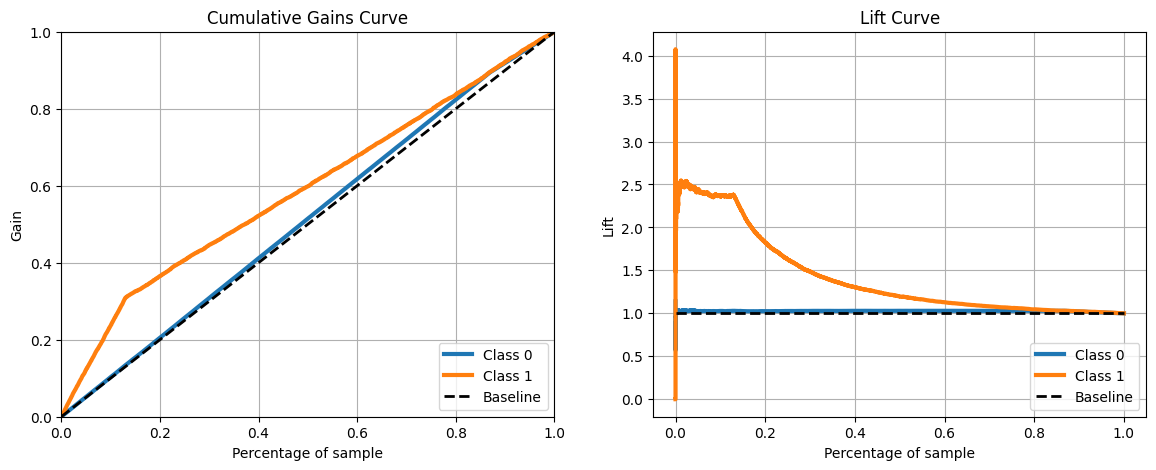

In [106]:
# model definition
dtc = DecisionTreeClassifier(random_state=42)

# model training
dtc.fit(x_train,y_train)

# model prediction
yhat_dtc=dtc.predict_proba(x_val);

# model prediction 2
yhat_dtc2=dtc.predict(x_val);
print((classification_report(y_val, yhat_dtc2,digits=4)))


df = x_validation.copy()
df['response'] = y_validation.copy()

# propensity score
df['score'] = yhat_dtc[:, 1].tolist()

# sort clients by propensity score
df = df.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df, k=20 )
precision_at_50, data = precision_at_k( df, k=50 )
print(f'Precision at 20% {precision_at_20}','\n')
print(f'Precision at 50% {precision_at_50}','\n')

# compute recall at k
recall_at_20, data = recall_at_k( df, k=20 )
recall_at_50, data = recall_at_k( df, k=50 )
print(f'Recall at 20% {recall_at_20}','\n')
print(f'Recall at 50% {recall_at_50}','\n')
print(f'Top k accuracy_score {top_k_accuracy_score(y_val, yhat_dtc2, k=2)}')

# accumulative gain
rcParams['figure.figsize'] = 14,5
grid=gridspec.GridSpec(1,2)

ax = plt.subplot(grid[0,0]) 
skplt.metrics.plot_cumulative_gain(y_val,yhat_dtc,ax=ax);

ax2 = plt.subplot(grid[0,1]) 
skplt.metrics.plot_lift_curve( y_val, yhat_dtc,ax=ax2 );

## **7.3 Knn**

              precision    recall  f1-score   support

           0     0.8905    0.9507    0.9196     66868
           1     0.3175    0.1640    0.2163      9354

    accuracy                         0.8541     76222
   macro avg     0.6040    0.5573    0.5679     76222
weighted avg     0.8201    0.8541    0.8333     76222

Precision at 20% 0.3333333333333333 

Precision at 50% 0.35294117647058826 

Recall at 20% 0.0007483429548856104 

Recall at 50% 0.001924310455420141 

Top k accuracy_score 1.0


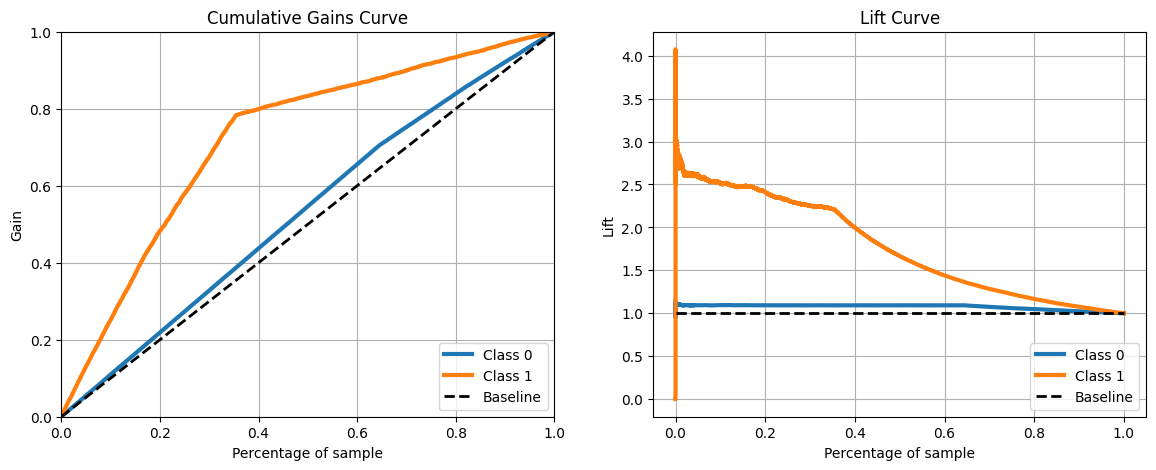

In [105]:
# model definition
knn=nh.KNeighborsClassifier(n_jobs=-1)

# model training
knn.fit(x_train,y_train)

# model prediction
yhat_knn=knn.predict_proba(x_val);

# model prediction 2
yhat_knn2=knn.predict(x_val);
print((classification_report(y_val, yhat_knn2,digits=4)))


df = x_validation.copy()
df['response'] = y_validation.copy()

# propensity score
df['score'] = yhat_knn[:, 1].tolist()

# sort clients by propensity score
df = df.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df, k=20 )
precision_at_50, data = precision_at_k( df, k=50 )
print(f'Precision at 20% {precision_at_20}','\n')
print(f'Precision at 50% {precision_at_50}','\n')

# compute recall at k
recall_at_20, data = recall_at_k( df, k=20 )
recall_at_50, data = recall_at_k( df, k=50 )
print(f'Recall at 20% {recall_at_20}','\n')
print(f'Recall at 50% {recall_at_50}','\n')
print(f'Top k accuracy_score {top_k_accuracy_score(y_val, yhat_knn2, k=2)}')

# accumulative gain
rcParams['figure.figsize'] = 14,5
grid=gridspec.GridSpec(1,2)

ax = plt.subplot(grid[0,0]) 
skplt.metrics.plot_cumulative_gain(y_val,yhat_knn,ax=ax);

ax2 = plt.subplot(grid[0,1]) 
skplt.metrics.plot_lift_curve( y_val, yhat_knn,ax=ax2 );

## **7.4 Extra trees**

              precision    recall  f1-score   support

           0     0.8894    0.9609    0.9238     66868
           1     0.3432    0.1461    0.2050      9354

    accuracy                         0.8609     76222
   macro avg     0.6163    0.5535    0.5644     76222
weighted avg     0.8224    0.8609    0.8356     76222

Precision at 20% 0.2857142857142857 

Precision at 50% 0.3333333333333333 

Recall at 20% 0.0006414368184733803 

Recall at 50% 0.0018174043190079111 

Top k accuracy_score 1.0


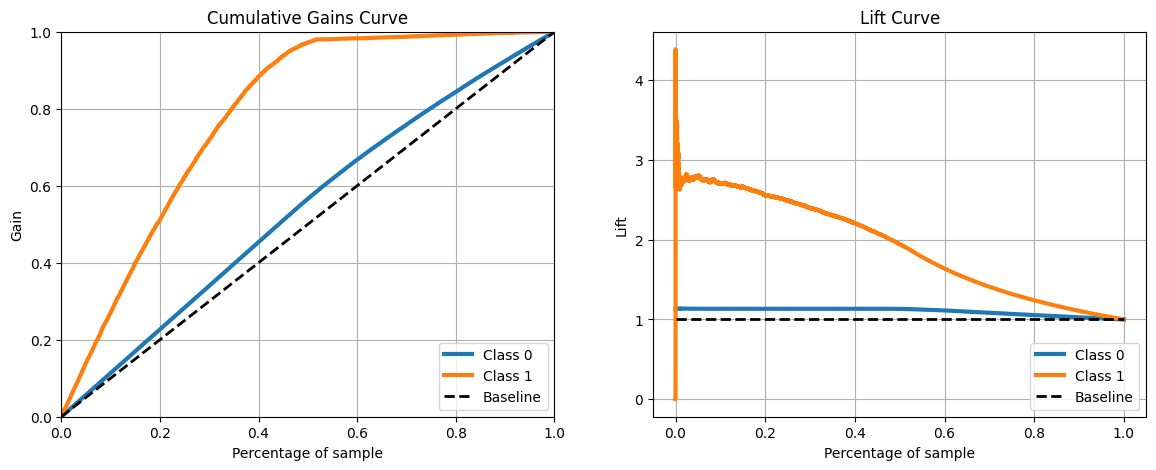

In [104]:
# model definition
et=en.ExtraTreesClassifier(n_jobs=-1,random_state=42)

# model training
et.fit(x_train,y_train)

# model prediction
yhat_et=et.predict_proba(x_val);

# model prediction 2
yhat_et2=et.predict(x_val);
print((classification_report(y_val, yhat_et2,digits=4)))


df = x_validation.copy()
df['response'] = y_validation.copy()

# propensity score
df['score'] = yhat_et[:, 1].tolist()

# sort clients by propensity score
df = df.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df, k=20 )
precision_at_50, data = precision_at_k( df, k=50 )
print(f'Precision at 20% {precision_at_20}','\n')
print(f'Precision at 50% {precision_at_50}','\n')

# compute recall at k
recall_at_20, data = recall_at_k( df, k=20 )
recall_at_50, data = recall_at_k( df, k=50 )
print(f'Recall at 20% {recall_at_20}','\n')
print(f'Recall at 50% {recall_at_50}','\n')
print(f'Top k accuracy_score {top_k_accuracy_score(y_val, yhat_et2, k=2)}')

# accumulative gain
rcParams['figure.figsize'] = 14,5
grid=gridspec.GridSpec(1,2)

ax = plt.subplot(grid[0,0]) 
skplt.metrics.plot_cumulative_gain(y_val,yhat_et,ax=ax);

ax2 = plt.subplot(grid[0,1]) 
skplt.metrics.plot_lift_curve( y_val, yhat_et,ax=ax2 );

## 7.5 Random forest

              precision    recall  f1-score   support

           0     0.8875    0.9683    0.9262     66868
           1     0.3517    0.1229    0.1822      9354

    accuracy                         0.8646     76222
   macro avg     0.6196    0.5456    0.5542     76222
weighted avg     0.8218    0.8646    0.8349     76222

Precision at 20% 0.38095238095238093 

Precision at 50% 0.4117647058823529 

Recall at 20% 0.0008552490912978405 

Recall at 50% 0.0022450288646568314 

Top k accuracy_score 1.0


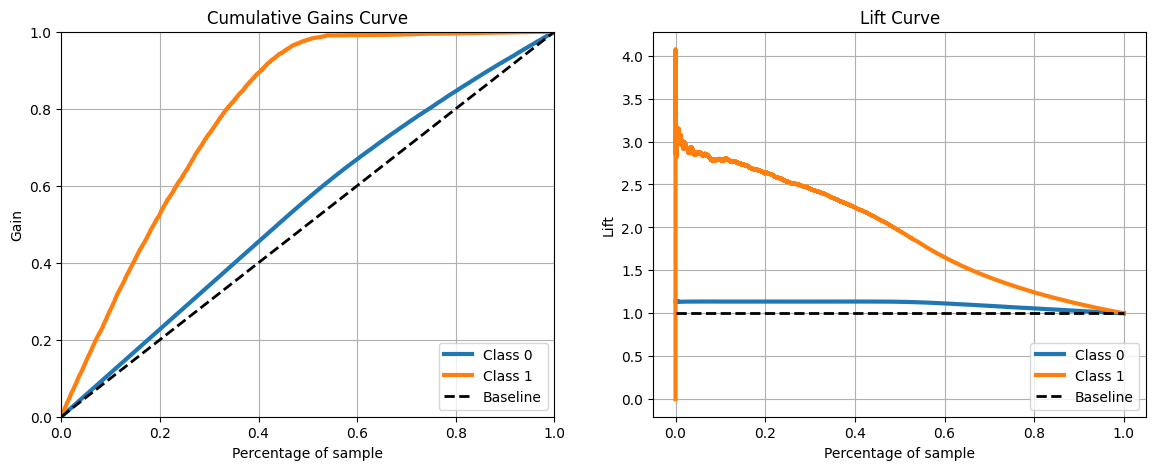

In [103]:
# model definition
rf = en.RandomForestClassifier(n_jobs=-1, random_state=42) 

# model training
rf.fit(x_train,y_train)

# model prediction
yhat_rf=rf.predict_proba(x_val);

# model prediction 2
yhat_rf2=rf.predict(x_val);
print((classification_report(y_val, yhat_rf2,digits=4)))


df = x_validation.copy()
df['response'] = y_validation.copy()

# propensity score
df['score'] = yhat_rf[:, 1].tolist()

# sort clients by propensity score
df = df.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df, k=20 )
precision_at_50, data = precision_at_k( df, k=50 )
print(f'Precision at 20% {precision_at_20}','\n')
print(f'Precision at 50% {precision_at_50}','\n')

# compute recall at k
recall_at_20, data = recall_at_k( df, k=20 )
recall_at_50, data = recall_at_k( df, k=50 )
print(f'Recall at 20% {recall_at_20}','\n')
print(f'Recall at 50% {recall_at_50}','\n')
print(f'Top k accuracy_score {top_k_accuracy_score(y_val, yhat_rf2, k=2)}')

# accumulative gain
rcParams['figure.figsize'] = 14,5
grid=gridspec.GridSpec(1,2)

ax = plt.subplot(grid[0,0]) 
skplt.metrics.plot_cumulative_gain(y_val,yhat_rf,ax=ax);

ax2 = plt.subplot(grid[0,1]) 
skplt.metrics.plot_lift_curve( y_val, yhat_rf,ax=ax2 );

## **7.6 XGB Classifier**

              precision    recall  f1-score   support

           0     0.8783    0.9977    0.9342     66868
           1     0.4129    0.0117    0.0227      9354

    accuracy                         0.8767     76222
   macro avg     0.6456    0.5047    0.4784     76222
weighted avg     0.8212    0.8767    0.8223     76222

Precision at 20% 0.23809523809523808 

Precision at 50% 0.37254901960784315 

Recall at 20% 0.0005345306820611504 

Recall at 50% 0.002031216591832371 

Top k accuracy_score 1.0


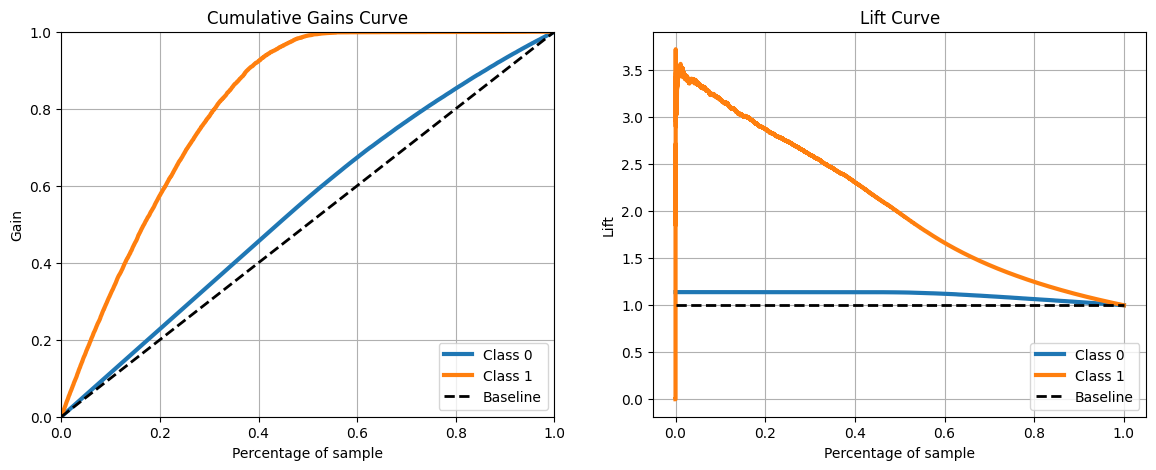

In [93]:
# model definition
xgb_model = xgb.XGBClassifier(n_jobs=-1, random_state=42) 

# model training
xgb_model.fit(x_train,y_train)

# model prediction
yhat_xgb=xgb_model.predict_proba(x_val);

# model prediction 2
yhat_xgb2=xgb_model.predict(x_val);
print((classification_report(y_val, yhat_xgb2,digits=4)))


df = x_validation.copy()
df['response'] = y_validation.copy()

# propensity score
df['score'] = yhat_xgb[:, 1].tolist()

# sort clients by propensity score
df = df.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df, k=20 )
precision_at_50, data = precision_at_k( df, k=50 )
print(f'Precision at 20% {precision_at_20}','\n')
print(f'Precision at 50% {precision_at_50}','\n')

# compute recall at k
recall_at_20, data = recall_at_k( df, k=20 )
recall_at_50, data = recall_at_k( df, k=50 )
print(f'Recall at 20% {recall_at_20}','\n')
print(f'Recall at 50% {recall_at_50}','\n')
print(f'Top k accuracy_score {top_k_accuracy_score(y_val, yhat_xgb2, k=2)}')

# accumulative gain
rcParams['figure.figsize'] = 14,5
grid=gridspec.GridSpec(1,2)

ax = plt.subplot(grid[0,0]) 
skplt.metrics.plot_cumulative_gain(y_val,yhat_xgb,ax=ax);

ax2 = plt.subplot(grid[0,1]) 
skplt.metrics.plot_lift_curve( y_val, yhat_xgb,ax=ax2 );

## **7.7 LGBM Classifier**

              precision    recall  f1-score   support

           0     0.8773    0.9999    0.9346     66868
           1     0.2500    0.0003    0.0006      9354

    accuracy                         0.8772     76222
   macro avg     0.5636    0.5001    0.4676     76222
weighted avg     0.8003    0.8772    0.8200     76222

Precision at 20% 0.19047619047619047 

Precision at 50% 0.4117647058823529 

Recall at 20% 0.00042762454564892024 

Recall at 50% 0.0022450288646568314 

Top k accuracy_score 1.0


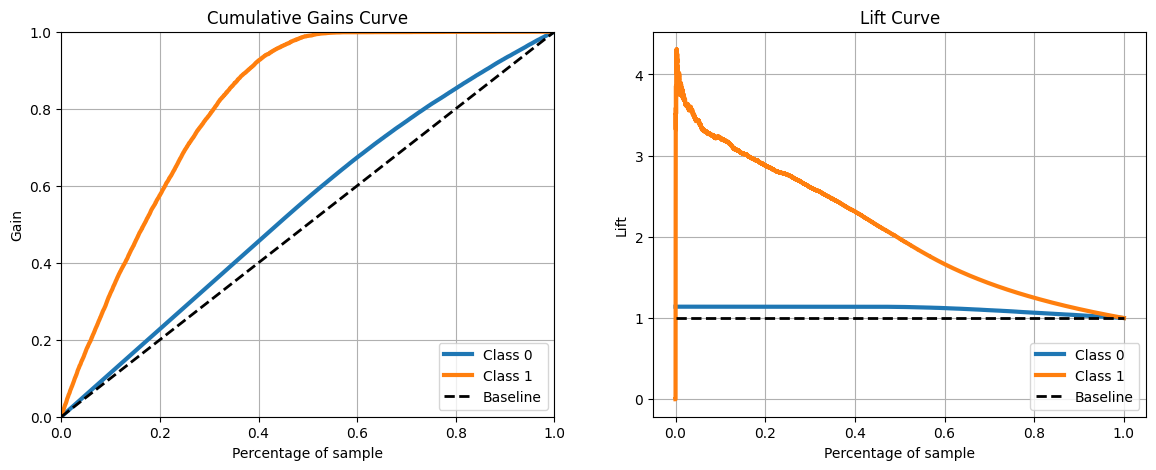

In [109]:
# model definition
lgbm = lightgbm.LGBMClassifier(n_jobs=-1,random_state=42) 

# model training
lgbm.fit(x_train,y_train)

# model prediction
yhat_lgbm=lgbm.predict_proba(x_val);

# model prediction 2
yhat_lgbm2=lgbm.predict(x_val);
print((classification_report(y_val, yhat_lgbm2,digits=4)))


df = x_validation.copy()
df['response'] = y_validation.copy()

# propensity score
df['score'] = yhat_lgbm[:, 1].tolist()

# sort clients by propensity score
df = df.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df, k=20 )
precision_at_50, data = precision_at_k( df, k=50 )
print(f'Precision at 20% {precision_at_20}','\n')
print(f'Precision at 50% {precision_at_50}','\n')

# compute recall at k
recall_at_20, data = recall_at_k( df, k=20 )
recall_at_50, data = recall_at_k( df, k=50 )
print(f'Recall at 20% {recall_at_20}','\n')
print(f'Recall at 50% {recall_at_50}','\n')
print(f'Top k accuracy_score {top_k_accuracy_score(y_val, yhat_lgbm2, k=2)}')

# accumulative gain
rcParams['figure.figsize'] = 14,5
grid=gridspec.GridSpec(1,2)

ax = plt.subplot(grid[0,0]) 
skplt.metrics.plot_cumulative_gain(y_val,yhat_lgbm,ax=ax);

ax2 = plt.subplot(grid[0,1]) 
skplt.metrics.plot_lift_curve( y_val, yhat_lgbm,ax=ax2 );

# **Step 8 Hyperparameter fine tuning + cross validation**

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
              precision    recall  f1-score   support

           0     0.8790    0.9997    0.9355     66977
           1     0.5957    0.0030    0.0060      9245

    accuracy                         0.8788     76222
   macro avg     0.7374    0.5014    0.4708     76222
weighted avg     0.8446    0.8788    0.8227     76222

Precision at 20% 0.5714285714285714 

Precision at 50% 0.5686274509803921 

Recall at 20% 0.0012979989183342347 

Recall at 50% 0.0031368307193077338 

Top k accuracy_score 1.0


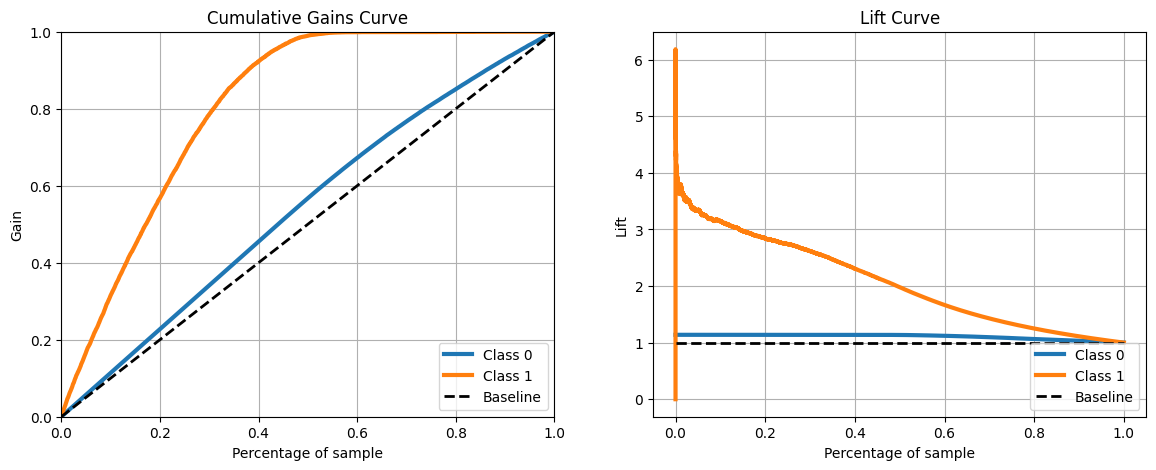

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warnin

In [144]:
#
lgbm = lightgbm.LGBMClassifier(n_jobs=-1,random_state=42, verbose=-1) 


params={'learning_rate': [0.1,0.3],
        'max_depth':[3,12],
        'num_leaves':[40,100],
        'min_data_in_leaf':[50,100]}


lgbm = GridSearchCV(lgbm, param_grid=params,scoring='roc_auc',cv=5,n_jobs=-1,verbose=-1)
lgbm.fit(x_train, y_train)
        

# model prediction
yhat_lgbm=lgbm.predict_proba(x_val);

# model prediction 2
yhat_lgbm2=lgbm.predict(x_val);
print((classification_report(y_val, yhat_lgbm2,digits=4)))


df = x_validation.copy()
df['response'] = y_validation.copy()

# propensity score
df['score'] = yhat_lgbm[:, 1].tolist()

# sort clients by propensity score
df = df.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df, k=20 )
precision_at_50, data = precision_at_k( df, k=50 )
print(f'Precision at 20% {precision_at_20}','\n')
print(f'Precision at 50% {precision_at_50}','\n')

# compute recall at k
recall_at_20, data = recall_at_k( df, k=20 )
recall_at_50, data = recall_at_k( df, k=50 )
print(f'Recall at 20% {recall_at_20}','\n')
print(f'Recall at 50% {recall_at_50}','\n')
print(f'Top k accuracy_score {top_k_accuracy_score(y_val, yhat_lgbm2, k=2)}')

# accumulative gain
rcParams['figure.figsize'] = 14,5
grid=gridspec.GridSpec(1,2)

ax = plt.subplot(grid[0,0]) 
skplt.metrics.plot_cumulative_gain(y_val,yhat_lgbm,ax=ax);

ax2 = plt.subplot(grid[0,1]) 
skplt.metrics.plot_lift_curve( y_val, yhat_lgbm,ax=ax2 );